<a href="https://colab.research.google.com/github/NaiaraSanz/Tesis_Emotivismo_Polarizacion_Topicmodelling_Twitter/blob/main/Tesis_Leysiessi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar librer√≠as

In [1]:
!pip install --upgrade accelerate


  Using cached accelerate-0.27.0-py3-none-any.whl.metadata (18 kB)
Using cached accelerate-0.27.0-py3-none-any.whl (279 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.22.0
    Uninstalling accelerate-0.22.0:
      Successfully uninstalled accelerate-0.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pysentimiento 0.7.2 requires accelerate<0.23.0,>=0.22.0, but you have accelerate 0.27.0 which is incompatible.


In [2]:
!pip install --upgrade pip


In [3]:
!pip install pysentimiento
from pysentimiento import create_analyzer
analyzer_sentiment = create_analyzer(task="sentiment", lang="es")
analyzer_hate=create_analyzer(task="hate_speech", lang="es")
analyzer_emotion=create_analyzer(task="emotion", lang="es")

  Using cached accelerate-0.22.0-py3-none-any.whl.metadata (17 kB)
Using cached accelerate-0.22.0-py3-none-any.whl (251 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.27.0
    Uninstalling accelerate-0.27.0:
      Successfully uninstalled accelerate-0.27.0


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/956 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [4]:
!pip install emoji
import emoji

In [5]:
!pip install spacy
!python -m spacy download es_core_news_lg
import spacy

nlp = spacy.load("es_core_news_lg")

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 568.0/568.0 MB 1.4 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
!pip install gensim
import gensim
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, preprocess_string, strip_short, stem_text
from gensim import corpora

from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

In [7]:
!pip install nltk


In [8]:
import nltk
nltk.download('all')
from nltk.corpus import opinion_lexicon
opinion_lexicon.ensure_loaded()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [30]:
!pip install pandas==1.2.2  # Se necesita para evitar un error de incompatibilidad
import pandas as pd

  Using cached pandas-1.2.2.tar.gz (5.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user


In [10]:
!pip install openpyxl
from openpyxl import Workbook
import openpyxl

In [11]:
!pip install numpy==1.20.1  --no-input # Se necesita para evitar un error de incompatibilidad


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  √ó Building wheel for numpy (pyproject.toml) did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects


In [12]:
!pip install gensim

In [13]:
!pip install matplotlib

In [14]:
!pip install joblib==1.1.0


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 307.0/307.0 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [15]:
#!pip install pyLDAvis==3.3.0
#!pip install git+https://github.com/bmabey/pyLDAvis.git #Esto instalar√° pyLDAvis directamente desde el repositorio en GitHub y puede ayudar a evitar el problema de instalaci√≥n que est√°s enfrentando.
!pip install pyLDAvis==2.1.2


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=2071c4f8a2f2c812b06de6b311ceafa47649ccba4dd34963e3146becf1553102
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [16]:
#!pip install scipy==1.6.0 --no-input # Se necesita para evitar un error de incompatibilidad
#!pip install --upgrade scipy
!pip install --upgrade gensim


In [32]:
#para nubes de palabras
!pip install wordcloud matplotlib


#Stopwords y puntuaci√≥n.

In [60]:
import nltk
from nltk.corpus import stopwords

# Descargar la lista de stopwords en espa√±ol de NLTK
nltk.download('stopwords')

# Definir la lista de conectores y verbos a eliminar
connectorslist = ['a prop√≥sito', 'ahora bien', 'de hecho', 'debido a', 'en cambio', 'en cualquier caso', 'en realidad', 'en todo caso', 'es decir', 'no obstante', 'o sea', 'pero', 'por el contrario', 'por eso', 'por lo tanto', 'por qu√©', 'por tanto', 'porque', 'sin embargo', 'a/p', 'a.b.', 'd/f', 'd/a', 'e/c', 'e/cc', 'e/r', 'e/tc', 'es.d.', 'n/o', 'o.s.', 'p.', 'p/ec', 'p/e', 'p/lt', 'p/q', 'p/t', 'pq', 's/e', 'xk', 'xq', 'pa', 'pa\'', 'q', 'ke', 'cn', 'kn', 'cm', 'komo', 'smpre', 'smp', 'aunk', 'aunk', 'kuando', 'ku√°ndo', 'entons', 'entcs', 'mientrs', 'mnts', 'dsd', 'dezde', 'asta', 'ast', 'aunq', 'aunke', '+', 'mas', '-', 'mns']

vbslist = ['considerar', 'creer', 'cuestionar', 'discutir', 'explicar', 'imaginar', 'opinar', 'pensar', 'proponer',
           'sospechar', 'sostener', 'suponer']

# Obtener la lista de stopwords original de NLTK
stopwords_spanish = stopwords.words('spanish')

# Crear una nueva lista de stopwords sin los conectores y verbos conjugados
new_stopwords = [word for word in stopwords_spanish if word not in connectorslist and word not in vbslist]

# Imprimir la nueva lista de stopwords
print(new_stopwords)




['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'm√°s', 'sus', 'le', 'ya', 'o', 'este', 's√≠', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'tambi√©n', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'm√≠', 'antes', 'algunos', 'qu√©', 'unos', 'yo', 'otro', 'otras', 'otra', '√©l', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 't√∫', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'm√≠o', 'm√≠a', 'm√≠os', 'm√≠as', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'est√°s', 'est√°', 'estamos', 'est√°is', 'est√°n', 'est√

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
import spacy
from spacy.lang.es import Spanish

nlp = Spanish()

# Obtiene la lista de signos de puntuaci√≥n actual
punctuations = nlp.Defaults.tokenizer_exceptions.get('punct', [])

# Crea una nueva lista sin las exclamaciones e interrogaciones
new_punctuations = [punct for punct in punctuations if punct[0] not in ['¬°', '!', '¬ø', '?']]

# Actualiza la lista de signos de puntuaci√≥n con la nueva lista
nlp.Defaults.tokenizer_exceptions['punct'] = new_punctuations





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Cargar los archivos y transformarlos y limpiar lista

In [50]:
def loadText(path):
    file = open(path, "r") #abrir archivo modo lectura
    all_text = file.read() #guardar contenido archivo en un string (leer archivo)
    texts_list = all_text.split("\n") #lista sin intros, al contrario como lo he escrito en el archivo
    file.close() #cierro archivo
    texts_list.pop()#quitar √∫ltimo elemento de la lista porque es un intro
    return texts_list #devuelvo lista de texto

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
import json

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
def loadTuits(path):
    tuits = []
    with open(path, 'r') as openfile:
        for line in openfile:
            jsonLoaded = json.loads(line)
            tuits.append(jsonLoaded)
    return tuits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
def deJSONaText(listaTuits):
    lista_resultado = []
    for tuit in listaTuits:
        texto = tuit["text"]
        lista_resultado.append(texto)
    return lista_resultado

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
def limpiarTextos(textos):
  lista_resultado = []
  for texto in textos:
    lista_resultado.append(limpiar(texto))
  return lista_resultado

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
import re

def limpiar(frase):
    # Reemplazar los espacios dentro de las menciones de usuario
    frase = re.sub(r'@(\S+)', lambda m: '@' + m.group(1).replace(' ', ''), frase)
    # Tokenizar la frase sin dividir las menciones de usuario, los enlaces, y considerando exclamaciones, interrogaciones y emoticonos
    tokens = re.findall(r'(?:https?://\S+)|\w+|[@#]\w+|[¬°!¬ø?]|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', frase)
    # Filtrar los tokens que no est√°n en la lista de stopwords personalizadas ni en la lista de puntuaci√≥n
    tokens_filtrados = [token for token in tokens if token not in new_stopwords and token not in new_punctuations]
    # Unir los tokens limpios en una frase
    frase_limpia = ' '.join(tokens_filtrados)
    return frase_limpia



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
def saveText(path, textos_limpios): #ruta donde escribir texto OJO SOBREESCRIBIR y la variable del texto que quiero meter
    file = open(path, "w")
    for texto in textos_limpios:
        file.write(texto + '\n')
    file.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Ejecuci√≥n

In [63]:
# Cargamos los tuits desde el archivo.
tuits = loadTuits('/content/tweets')
# Convertimos los tuits de formato JSON a texto plano.
textos = deJSONaText(tuits)
# Guardamos los textos originales en un archivo CSV antes de limpiarlos.
with open("/content/tweetsoriginales.csv", mode='w', newline='', encoding='utf-8') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    for texto in textos:
        escritor_csv.writerow([texto])  # Cada texto es un tuit individual
# Limpiamos los textos.
textos_limpios = limpiarTextos(textos)
# Imprimimos los textos limpios.
print(textos_limpios)
# Guardamos los textos limpios.
guardar = saveText("/content/tweetslimpios.txt", textos_limpios)#punto=carpeta en la que ejecuto y nombre nuevo archivo que se va a crear

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['@guillena3 A LA ALTURA DE UN GRAN PA√çS Un baj√≠simo Feiijo Le falta letrero atril', 'No baje brazos Don Gonzalo üí™ üôè https://t.co/cm4gDHAOJh', '@YeraySurezZamo1 @jesusperea1 @PabloIglesias Es interesa Reducir debate b√°sico buscar solo enfrentamiento ciudadanos As√≠ triste pol√≠tica actual üèª', 'Vamos Messi ! Vamos gallardo !', 'Neymar Pity üòò', '@nlopeztrujillo @lauragarciagon De propia p√°gina web Director m√©dico trabaja El cl√≠nico hospital p√∫blico supuestamente objetores pero curiosamente conciertos IVE cl√≠nica https://t.co/SsqT8lkq62', '@iescolar Estaba cantado', '@PajaraMala @elnotadeaqui El tito negre dado cuenta pueden gustar hombres seguir siendo hombre', 'Galtier vs Gallardo gt gt gt gt gt gt gt Messi vs cr7', '@MVTARDE El q vulneraba ley protoco q firm√≥ CAM privando d derechos ancianos ir ser atendidos medico condenandomes morir total seguridad rodeados d heces orina', '@EmmaRincon Gentuza as√≠ mejor aborte reproduzca Le hace favor hijo mundo', '@cespinov ¬ø 

#seleccionar l√≠neas de archivo aleatoriamente

In [ ]:
from random import choice

def linea_aleatoria(archivo):
  try:
    with open(archivo,'r') as f:
      lineas = f.read().splitlines()
      return choice(lineas)

  except FileNotFoundError:
    return None
    print("El archivo seleccionado no existe")

In [ ]:
nombre_archivo="/content/tweetslimpios.txt"
resultado = linea_aleatoria (nombre_archivo)
print(resultado)

La @GVAeducacio manda colegiales 12 13 a√±os realizar encuestas pol√≠ticas fuerte carga ideol√≥gica üëâ @Raquel_Tamarit parece utiliza ni√±os deberes obligatorios @SocialistesVal @ppcv @CsCValenciana @Podem_ @vox_cv @ximopuig https://t.co/zRbbf6dU07


In [ ]:
import random

# Abre el archivo de texto de entrada
with open("/content/tweetslimpios.txt", "r") as archivo_entrada:
    # Lee todas las l√≠neas y almac√©nalas en una lista
    lineas = archivo_entrada.readlines()

# Abre el archivo de texto de salida en modo de escritura
with open("/content/muestras.txt", "w") as archivo_salida:
    # Itera 300 veces para obtener 300 muestras aleatorias
    for i in range(300):
        # Selecciona una muestra aleatoria de 300 l√≠neas del archivo
        muestra = random.sample(lineas, 1)
        # Convierte la lista de l√≠neas en una cadena de texto
        muestra_str = ''.join(muestra)
        # Escribe la muestra en el archivo de texto de salida
        archivo_salida.write(muestra_str)

# Crea un archivo de texto para las muestras no seleccionadas: Despu√©s de generar las muestras seleccionadas en el archivo "muestras.txt", se crea un conjunto (muestras_seleccionadas_set) con las l√≠neas seleccionadas para facilitar la b√∫squeda de las muestras no seleccionadas. Luego, se recorren todas las l√≠neas del archivo de entrada y se verifica si cada l√≠nea no est√° presente en el conjunto de muestras seleccionadas. En ese caso, se escribe la l√≠nea en el archivo "NOTchoice.txt".
muestras_seleccionadas_set = set(line.strip() for line in open("/content/muestras.txt"))
with open("/content/NOTchoice.txt", "w") as archivo_no_seleccionadas:
    for linea in lineas:
        if linea.strip() not in muestras_seleccionadas_set:
            archivo_no_seleccionadas.write(linea)

###Crear el excel autom√°tico de 300 tweets alteatorios



#### Crear excel

#####Seleccionados aleatoriamente

In [ ]:
# Especifica el nombre del archivo de texto que deseas leer
archivo_txt = "/content/muestras.txt"

# Lee el archivo de texto en un dataframe de pandas
df = pd.read_csv(archivo_txt, delimiter="\t", header=None, names=["Tweet", "Sentimiento", "Dirigido a personas", "Dirigido a minor√≠as", "Ira", "Repugnancia", "Sorpresa", "Alegr√≠a", "Miedo", "Tristeza", "May√∫sculas", "Emoticonos", "Conectores", "Multimedia", "Verbos de argumento", "Exclamaciones e interrogaciones", "Emotividad"])

# Especifica el nombre del archivo de Excel en el que deseas escribir los datos
archivo_excel = "/content/choicetweets.xlsx"

# Escribe el dataframe en el archivo de Excel con los encabezados especificados
df.to_excel(archivo_excel, index=False)


ImportError: cannot import name 'Label' from 'pandas._typing' (/usr/local/lib/python3.10/dist-packages/pandas/_typing.py)

##### NO Seleccionados aleatoriamente

In [ ]:
# Especifica el nombre del archivo de texto "NOTchoice.txt"
archivo_txt_notchoice = "/content/NOTchoice.txt"

# Lee el archivo de texto en un dataframe de pandas
df_notchoice = pd.read_csv(archivo_txt_notchoice, delimiter="\t", header=None, names=["Tweet", "Sentimiento", "Dirigido a personas", "Dirigido a minor√≠as", "Ira", "Repugnancia", "Sorpresa", "Alegr√≠a", "Miedo", "Tristeza", "May√∫sculas", "Emoticonos", "Conectores", "Multimedia", "Verbos de argumento", "Exclamaciones e interrogaciones", "Emotividad"])

# Especifica el nombre del archivo de Excel en el que deseas escribir los datos
archivo_excel_notchoice = "/content/NOTchoicetweets.xlsx"

# Escribe el dataframe en el archivo de Excel con los encabezados especificados
df_notchoice.to_excel(archivo_excel_notchoice, index=False)


ImportError: cannot import name 'Label' from 'pandas._typing' (/usr/local/lib/python3.10/dist-packages/pandas/_typing.py)

##Rellenar el excel con los resultados de las funciones

###Importa la biblioteca openpyxl

In [ ]:
import openpyxl


###Carga el archivo de Excel que quieres modificar:

In [ ]:
workbook = openpyxl.load_workbook("/content/choicetweets.xlsx")

###Selecciona la hoja de c√°lculo que quieres modificar:

In [ ]:
hoja  = workbook['Sheet1']

###Crea una lista con los textos que quieres procesar

In [ ]:
columna_textos = hoja['A']  # asume que los textos est√°n en la columna A
textos = [celda.value for celda in columna_textos[1:]]  # ignora la primera celda (encabezado)


###Lo mismo para el excel de no seleccionadas

In [ ]:
workbook_notchoice = openpyxl.load_workbook("/content/NOTchoicetweets.xlsx")
hoja_notchoice = workbook_notchoice['Sheet1']
columna_textos_notchoice = hoja_notchoice['A']
textos_notchoice = [celda.value for celda in columna_textos_notchoice[1:]]


###Define una funci√≥n que procese cada texto y devuelva el resultado


#####Funciones

######Relaci√≥n de signos de exclamaci√≥n o interrogaci√≥n que contiene el texto

In [32]:
def relation_marks(texto):
    """
    Esta funci√≥n recibe un string 'texto' y devuelve la relaci√≥n entre el n√∫mero de signos de
    exclamaci√≥n y/o interrogaci√≥n que contiene respecto al total de caracteres del texto. Si no
    contiene ninguno, devuelve 0.0.
    En esta versi√≥n de la funci√≥n, se crea una variable total que representa la cantidad total de caracteres del texto,
    y se usa para calcular la relaci√≥n entre los signos de exclamaci√≥n e interrogaci√≥n y el total de caracteres del texto.
    Tambi√©n se agrega una excepci√≥n para evitar una divisi√≥n entre cero en caso de que el texto est√© vac√≠o.
    Al igual que en la funci√≥n shout, la funci√≥n percentage_marks devuelve un valor de relaci√≥n entre 0 y 1.
    """
    count = 0
    for char in texto:
        if char in "!?":
            count += 1

    total = len(texto)
    if total == 0:
        return 0.0
    else:
        relation = count / total
        return relation


######An√°lisis de sentimiento

In [33]:
def tweetsentiment (tweet):
  #0 negativo 1 neutro 2 positivo
  sentimiento=analyzer_sentiment.predict(tweet)
  sentimiento_output=sentimiento.output
  if sentimiento_output == "NEG":
    resultado=0
  elif sentimiento_output == "NEU":
    resultado=1
  else:
    resultado=2
  return resultado


######Dirigido a personas

In [34]:
import re

def tweettargetedperson(tweet):
    # 0 no 1 s√≠ dirigido a personas
    tweetlist = tweet.split()
    found = 0
    for word in tweetlist:
        if re.match(r"^@\w+", word):
            found = 1
    return found

#En esta versi√≥n de la funci√≥n, se utiliza el patr√≥n de expresi√≥n regular ^@\w+ para buscar un nombre de usuario de Twitter que comienza con "@". La expresi√≥n ^ indica el comienzo de la cadena, por lo que este patr√≥n solo coincidir√° con los tokens que comiencen con "@". Si se encuentra un token que coincide con este patr√≥n, se establece la variable found en 1 y se devuelve al final de la funci√≥n.

######Dirigido a minor√≠as

In [35]:
def tweettargetedgroup(tweet):
  #0 no, 1 s√≠ dirigido a minor√≠as
  hate=analyzer_hate.predict(tweet)
  hateoutput=hate.output
  if "targeted" in hateoutput:
    result=1
  elif "hateful" in hateoutput:
    result=1
  elif "aggressive" in hateoutput:
    result=1
  else:
    result=0
  return result

######Sentimientos que refleja el texto

In [36]:
def analyze_sentiments(tweet):
    emotion = analyzer_emotion.predict(tweet)

    anger = 1 if emotion.output == "anger" else 0
    disgust = 1 if emotion.output == "disgust" else 0
    surprise = 1 if emotion.output == "surprise" else 0
    joy = 1 if emotion.output == "joy" else 0
    fear = 1 if emotion.output == "fear" else 0
    sadness = 1 if emotion.output == "sadness" else 0

    return {
        "anger": anger,
        "disgust": disgust,
        "surprise": surprise,
        "joy": joy,
        "fear": fear,
        "sadness": sadness
    }





######comprobar si tiene may√∫sculas (gritar)

In [37]:
def shout(tweet):
  lower=0
  capital=0
  for letter in tweet:
    if letter.islower():
      lower+=1
    elif letter.isupper():
      capital+=1
  total=lower+capital
  try:
    relation=capital/total
  except ZeroDivisionError:
    relation=0.0
  return relation


######Comprobar si tiene emoticonos
¬ølos emoticonos hacen m√°s emotivo el mensaje y menos argumentativo?

In [38]:
def emojis(tweet):
  total_emojis=0
  for character in tweet:
    if character in emoji.UNICODE_EMOJI['es']:
      total_emojis+=1
  try:
    relation=total_emojis/len(tweet.split())
  except ZeroDivisionError:
    relation=0.0
  return relation

######Comprobar si tiene conectores para ver si argumenta (no emotivo)

In [39]:
def connectors(tweet, connectorslist):
  tweetlower=tweet.lower()
  numconnector=0
  for connector in connectorslist:
    if connector in tweetlower: #verificar si el conector est√° en tweetlower, que es tweet convertido a min√∫sculas en la primera l√≠nea de la funci√≥n.
      numconnector+=1
  try:
    relation=numconnector/len(tweet.split())
  except ZeroDivisionError:
    relation=0.0

  return relation




In [40]:
connectorslist = ['a prop√≥sito', 'ahora bien', 'de hecho', 'debido a', 'en cambio', 'en cualquier caso', 'en realidad', 'en todo caso', 'es decir', 'no obstante', 'o sea', 'pero', 'por el contrario', 'por eso', 'por lo tanto', 'por qu√©', 'por tanto', 'porque', 'sin embargo', 'a/p', 'a.b.', 'd/f', 'd/a', 'e/c', 'e/cc', 'e/r', 'e/tc', 'es.d.', 'n/o', 'o.s.', 'p.', 'p/ec', 'p/e', 'p/lt', 'p/q', 'p/t', 'pq', 's/e', 'xk', 'xq', 'pa', 'pa\'', 'q', 'ke', 'cn', 'kn', 'cm', 'komo', 'smpre', 'smp', 'aunk', 'aunk', 'kuando', 'ku√°ndo', 'entons', 'entcs', 'mientrs', 'mnts', 'dsd', 'dezde', 'asta', 'ast', 'aunq', 'aunke', '+', 'mas', '-', 'mns']


######¬øContienen multimedia?

In [41]:
def multimedia(tweet):
  #0 no 1 s√≠
  tweetlist=tweet.split()
  found=0
  for word in tweetlist:
    if word.startswith("https://"):
      found=1
  return found

######verbos de argumento

In [42]:
vbslist = ['considerar', 'creer', 'cuestionar', 'discutir', 'explicar', 'imaginar', 'opinar', 'pensar', 'proponer', 'sospechar', 'sostener', 'suponer']


In [43]:
"""
 he modificado la funci√≥n argument para utilizar la librer√≠a NLTK junto con su etiquetador gramatical para obtener las etiquetas gramaticales de las palabras en el tweet y
 luego verificar si alguna de las formas lematizadas de los verbos de tu lista coincide con alguna de las etiquetas verbales en el tweet.
 Se utiliza nltk.pos_tag para etiquetar gramaticalmente los tokens del tweet utilizando el conjunto de etiquetas universal.
 Luego, se verifica si el token etiquetado es un verbo ('VERB') y si su lema coincide con alguno de los verbos de tu lista vbslist.
 Si es as√≠, se incrementa el contador num_vbs_list. Al final, se calcula la relaci√≥n dividiendo num_vbs_list entre el n√∫mero total de tokens en el tweet.
"""
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer

def argument(tweet, vbslist):
    # Tokenizar el tweet
    tokens = nltk.word_tokenize(tweet)

    # Etiquetar gramaticalmente los tokens
    tagged_tokens = nltk.pos_tag(tokens, tagset='universal')

    # Inicializar el lematizador de NLTK
    lemmatizer = WordNetLemmatizer()

    num_vbs_list = 0
    for token, tag in tagged_tokens:
        if tag == 'VERB' and lemmatizer.lemmatize(token, pos='v') in vbslist:
            num_vbs_list += 1

    try:
        relation = num_vbs_list / len(tokens)
    except ZeroDivisionError:
        relation = 0.0

    return relation


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### itera sobre cada fila de la hoja de c√°lculo y aplica la funci√≥n a cada texto

1.   Sentimiento
2.   Dirigido a personas
3.   Dirigido a minor√≠as
4.   Ira
5.   Repugnancia
6.   Sorpresa
7.   Alegr√≠a
8.   Miedo
9.   Tristeza
10.   May√∫sculas
11.   Emoticonos
12.   Conectores
13.   Multimedia
14.   Verbos de argumento
15.  Exclamaciones e interrogaciones


In [ ]:
# Recorrer cada fila de la hoja de c√°lculo
for fila in hoja.iter_rows(min_row=2):
    # Obtener el texto de la primera columna
    tweet = fila[0].value

    # Aplicar las funciones de an√°lisis de texto
    sentimiento = tweetsentiment(tweet)  # 1
    targeted = tweettargetedperson(tweet)  # 2
    minorias = tweettargetedgroup(tweet)  # 3
    sentiment_results = analyze_sentiments(tweet)
    anger = sentiment_results["anger"]  # 5 - Sentimiento: anger
    disgust = sentiment_results["disgust"]  # 6 - Sentimiento: disgust
    surprise = sentiment_results["surprise"]  # 7 - Sentimiento: surprise
    joy = sentiment_results["joy"]  # 8 - Sentimiento: joy
    fear = sentiment_results["fear"]  # 9 - Sentimiento: fear
    sadness = sentiment_results["sadness"]  # 10 - Sentimiento: sadness
    shouting = shout(tweet)  # 11
    emoticonos = emojis(tweet)  # 12
    conectores = connectors(tweet, connectorslist)  # 13
    has_multimedia = multimedia(tweet)  # 14
    vbs = argument(tweet, vbslist)  # 15
    marks = relation_marks(tweet)  # 16

    # Seleccionar la fila correspondiente
    fila[1].value = sentimiento
    fila[2].value = targeted
    fila[3].value = minorias
    fila[4].value = anger
    fila[5].value = disgust
    fila[6].value = surprise
    fila[7].value = joy
    fila[8].value = fear
    fila[9].value = sadness
    fila[10].value = shouting
    fila[11].value = emoticonos
    fila[12].value = conectores
    fila[13].value = has_multimedia
    fila[14].value = vbs
    fila[15].value = marks




Para las no seleccionadas aleatoriamente:

In [ ]:
# Recorrer cada fila de la hoja de c√°lculo
for fila in hoja_notchoice.iter_rows(min_row=2):
    # Obtener el texto de la primera columna
    tweet = fila[0].value

    # Aplicar las funciones de an√°lisis de texto
    sentimiento = tweetsentiment(tweet)  # 1
    targeted = tweettargetedperson(tweet)  # 2
    minorias = tweettargetedgroup(tweet)  # 3
    sentiment_results = analyze_sentiments(tweet)
    anger = sentiment_results["anger"]  # 5 - Sentimiento: anger
    disgust = sentiment_results["disgust"]  # 6 - Sentimiento: disgust
    surprise = sentiment_results["surprise"]  # 7 - Sentimiento: surprise
    joy = sentiment_results["joy"]  # 8 - Sentimiento: joy
    fear = sentiment_results["fear"]  # 9 - Sentimiento: fear
    sadness = sentiment_results["sadness"]  # 10 - Sentimiento: sadness
    shouting = shout(tweet)  # 11
    emoticonos = emojis(tweet)  # 12
    conectores = connectors(tweet, connectorslist)  # 13
    has_multimedia = multimedia(tweet)  # 14
    vbs = argument(tweet, vbslist)  # 15
    marks = relation_marks(tweet)  # 16

    # Seleccionar la fila correspondiente
    fila[1].value = sentimiento
    fila[2].value = targeted
    fila[3].value = minorias
    fila[4].value = anger
    fila[5].value = disgust
    fila[6].value = surprise
    fila[7].value = joy
    fila[8].value = fear
    fila[9].value = sadness
    fila[10].value = shouting
    fila[11].value = emoticonos
    fila[12].value = conectores
    fila[13].value = has_multimedia
    fila[14].value = vbs
    fila[15].value = marks


#### guarda los cambios en el archivo de Excel


In [ ]:
workbook.save("/content/choicetweetsclasificados.xlsx")

In [ ]:
workbook_notchoice.save("/content/NOTchoicetweetsclasificados.xlsx")
#Para los no seleccionados aleatoriamente

#rellenar excel a mano
emotivo o no se sabe (1) o no emotivo (0)

#cargarlo de vuelta

In [ ]:
import pandas as pd

datos = pd.read_excel("/content/choicetweetsclasificados.xlsx")


#MODELOS:
* Naive Bayes: Utilizamos el modelo MultinomialNB de Naive Bayes para realizar la clasificaci√≥n de los datos. Calculamos la precisi√≥n del modelo utilizando accuracy_score.

* Regresi√≥n Log√≠stica: Utilizamos el modelo LogisticRegression de regresi√≥n log√≠stica para realizar la clasificaci√≥n de los datos. Calculamos la precisi√≥n del modelo utilizando accuracy_score y generamos la matriz de confusi√≥n.

* √Årbol de Decisi√≥n: Utilizamos el modelo DecisionTreeClassifier de √°rbol de decisi√≥n para realizar la clasificaci√≥n de los datos. Calculamos la precisi√≥n del modelo utilizando accuracy_score y generamos la matriz de confusi√≥n.

* Support Vector Machines (SVM): Es un algoritmo de aprendizaje supervisado que puede ser utilizado para problemas de clasificaci√≥n binaria o multiclase. SVM busca encontrar el hiperplano que mejor separa las clases en el espacio de caracter√≠sticas.

* Random Forest: Es un algoritmo de aprendizaje supervisado que combina m√∫ltiples √°rboles de decisi√≥n para realizar la clasificaci√≥n. Cada √°rbol en el bosque toma una decisi√≥n y la clase final se determina por votaci√≥n.

* Gradient Boosting: Es un m√©todo de ensamblado que combina m√∫ltiples modelos m√°s d√©biles (generalmente √°rboles de decisi√≥n) para formar un modelo m√°s fuerte. Cada modelo en el conjunto se construye secuencialmente, corrigiendo los errores del modelo anterior.

* Redes Neuronales: Son modelos de aprendizaje profundo que se basan en la estructura y funcionamiento de las redes neuronales biol√≥gicas. Utilizan capas de neuronas artificiales interconectadas para realizar la clasificaci√≥n.

* K-Nearest Neighbors (KNN): Es un algoritmo de clasificaci√≥n basado en la proximidad de los datos. Clasifica una instancia bas√°ndose en las etiquetas de las instancias cercanas en el espacio de caracter√≠sticas.

La interpretaci√≥n de los resultados de los modelos de clasificaci√≥n puede variar dependiendo del contexto y los objetivos espec√≠ficos del problema. Sin embargo, aqu√≠ hay algunas pautas generales para interpretar los resultados:

* Precisi√≥n del modelo: La precisi√≥n es una medida de qu√© tan bien el modelo clasifica correctamente las instancias. Se calcula dividiendo el n√∫mero de predicciones correctas entre el n√∫mero total de instancias. Una mayor precisi√≥n indica que el modelo tiene una capacidad de clasificaci√≥n m√°s precisa.

* Matriz de confusi√≥n: La matriz de confusi√≥n muestra el n√∫mero de predicciones clasificadas correctamente e incorrectamente por el modelo. Proporciona una visi√≥n detallada del rendimiento del modelo en t√©rminos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Al analizar la matriz de confusi√≥n, puedes evaluar el equilibrio entre los diferentes tipos de errores de clasificaci√≥n del modelo.

* Curva ROC y √°rea bajo la curva ROC (AUC-ROC): La curva ROC representa la relaci√≥n entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (1 - especificidad) a medida que se var√≠a el umbral de clasificaci√≥n del modelo. Un √°rea bajo la curva ROC mayor indica un mejor rendimiento del modelo en la clasificaci√≥n binaria.

* Interpretaci√≥n espec√≠fica del problema: Dependiendo del problema y los datos en particular, puedes darle un significado m√°s espec√≠fico a los resultados del modelo. Por ejemplo, si est√°s clasificando correos electr√≥nicos como "spam" o "no spam", puedes evaluar el modelo en funci√≥n de la precisi√≥n para evitar falsos positivos (correos electr√≥nicos leg√≠timos clasificados como spam) o sensibilidad para evitar falsos negativos (correos electr√≥nicos de spam no identificados).

En resumen, la precisi√≥n y la matriz de confusi√≥n proporcionan informaci√≥n importante sobre el rendimiento del modelo en t√©rminos de clasificaci√≥n correcta e incorrecta. La curva ROC y el AUC-ROC eval√∫an el rendimiento general del modelo en la clasificaci√≥n binaria.

##Naivebayes

###Importar las bibliotecas necesarias:


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

###Cargar el archivo Excel en un DataFrame y guardarlo en una variable:

In [ ]:
# Especifica el nombre del archivo Excel
archivo_excel = "/content/choicetweetsclasificados.xlsx"

# Lee el archivo Excel en un DataFrame
datos = pd.read_excel(archivo_excel)

# Guarda el DataFrame en una variable para su uso posterior
df = datos


###Modelo




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Especifica el nombre del archivo Excel
archivo_excel = "/content/choicetweetsclasificados.xlsx"

# Lee el archivo Excel en un DataFrame
datos = pd.read_excel(archivo_excel)

# Verificar si los datos se han cargado correctamente
if datos.empty:
    print("El DataFrame est√° vac√≠o. Verifica que el archivo Excel contenga datos.")
else:
    # Verificar el n√∫mero de filas y columnas en el DataFrame
    num_filas, num_columnas = datos.shape
    print("N√∫mero de filas en el DataFrame:", num_filas)
    print("N√∫mero de columnas en el DataFrame:", num_columnas)

    # Verificar si hay filas vac√≠as o nulas en el DataFrame
    num_filas_vacias = datos.isnull().sum().sum()
    if num_filas_vacias > 0:
        print("El DataFrame contiene filas vac√≠as o nulas.")
    else:
        print("El DataFrame no contiene filas vac√≠as o nulas.")

    # Verificar si hay duplicados en el DataFrame
    num_filas_duplicadas = datos.duplicated().sum()
    if num_filas_duplicadas > 0:
        print("El DataFrame contiene filas duplicadas.")
    else:
        print("El DataFrame no contiene filas duplicadas.")

    # Verificar las columnas en el DataFrame
    columnas_esperadas = ['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones', 'Emotividad']
    columnas_actuales = datos.columns.tolist()

    if columnas_esperadas != columnas_actuales:
        print("Las columnas del DataFrame no coinciden con las columnas esperadas.")
        print("Columnas esperadas:", columnas_esperadas)
        print("Columnas actuales:", columnas_actuales)
    else:
        print("Las columnas del DataFrame coinciden con las columnas esperadas.")


# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

# Verificar nuevamente si hay filas duplicadas despu√©s de eliminarlas
num_filas_duplicadas = datos.duplicated().sum()
if num_filas_duplicadas > 0:
    print("El DataFrame a√∫n contiene filas duplicadas despu√©s de eliminarlas.")
else:
    print("Se han eliminado todas las filas duplicadas del DataFrame.")


# Verificar el n√∫mero de filas en el DataFrame sin duplicados
print("N√∫mero de filas en el DataFrame sin duplicados:", len(datos))

# Dividir los datos en conjuntos de entrenamiento y prueba solo si hay suficientes filas
if len(datos) >= 2:
    X = datos[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
    y = datos['Emotividad']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    from sklearn.feature_extraction.text import CountVectorizer

    # Crear un vectorizador de caracter√≠sticas
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(X_train['Tweet'])
    X_test = vectorizer.transform(X_test['Tweet'])

    # Entrenar el modelo de Naive Bayes
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Realizar la clasificaci√≥n de los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisi√≥n del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Precisi√≥n del modelo: {:.2f}".format(accuracy))

else:
    print("No hay suficientes filas en el DataFrame para dividir los datos en entrenamiento y prueba.")


###Matriz de confusi√≥n

In [ ]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusi√≥n
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusi√≥n:")
print(confusion_matrix)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)

# Crear el gr√°fico de matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Configurar etiquetas y t√≠tulo del gr√°fico
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.title("Matriz de Confusi√≥n")

# Mostrar el gr√°fico
plt.show()


###Interpretaci√≥n:
* Verdaderos positivos (TP): 2
* Falsos positivos (FP): 28
* Falsos negativos (FN): 9
* Verdaderos negativos (TN): 50
* Precisi√≥n del modelo: 58%
* Tasa de verdaderos positivos (recall): 18.18%
* Tasa de verdaderos negativos (specificity): 64.10%
* Tasa de falsos positivos: 35.90%
* Tasa de falsos negativos: 81.82%

El modelo de Naive Bayes tiene una precisi√≥n del 58%, lo que indica que el 58% de las instancias fueron clasificadas correctamente. Sin embargo, su tasa de verdaderos positivos es baja, lo que indica que tiene dificultades para capturar correctamente las instancias no emotivas. Adem√°s, la tasa de falsos positivos es alta, lo que significa que clasifica err√≥neamente muchas instancias como emotivas cuando en realidad no lo son. Esto sugiere que el modelo puede ser propenso a generar falsos positivos y no es tan confiable en la clasificaci√≥n de los casos no emotivos.



##Regresi√≥n lineal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Especifica el nombre del archivo Excel
archivo_excel = "/content/choicetweetsclasificados.xlsx"

# Lee el archivo Excel en un DataFrame
datos = pd.read_excel(archivo_excel)

# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos[['Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = datos['Emotividad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresi√≥n lineal
model_regresion_lineal = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model_regresion_lineal.fit(X_train, y_train)

# Realizar las predicciones con el conjunto de datos de prueba
y_pred_test = model_regresion_lineal.predict(X_test)

# Calcular el error cuadr√°tico medio del modelo
mse = mean_squared_error(y_test, y_pred_test)
print("Error cuadr√°tico medio del modelo: {:.2f}".format(mse))

# Guardar los resultados en un archivo Excel
resultados = pd.DataFrame({'Emotividad_real': y_test, 'Emotividad_predicha': y_pred_test})
resultados.to_excel('resultados_regresion_lineal.xlsx', index=False)

# La precisi√≥n se utiliza en problemas de clasificaci√≥n, mientras que en un modelo de regresi√≥n lineal se utiliza el error cuadr√°tico medio (MSE) o alguna otra m√©trica similar para evaluar el rendimiento del modelo
#El MSE representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales en el conjunto de prueba. Un MSE m√°s bajo indica un mejor ajuste del modelo a los datos.



###Diagrama de dispersi√≥n (scatter plot)


La matriz de confusi√≥n se utiliza para evaluar el rendimiento de modelos de clasificaci√≥n y no es aplicable directamente a un modelo de regresi√≥n lineal.
Para representar gr√°ficamente un modelo de regresi√≥n lineal, puedes utilizar un diagrama de dispersi√≥n (scatter plot) para mostrar los puntos de datos reales y las predicciones del modelo en un mismo gr√°fico.
Se puede hacer con utilizando la biblioteca matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Lee el archivo Excel en un DataFrame
archivo_excel = "/content/choicetweetsclasificados.xlsx"
datos = pd.read_excel(archivo_excel)

# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos[['Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = datos['Emotividad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresi√≥n lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Crear el gr√°fico de dispersi√≥n
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gr√°fico de dispersi√≥n: Valores reales vs. Predicciones')
plt.show()

#En este ejemplo, utilizamos el m√©todo scatter de matplotlib.pyplot para crear un gr√°fico de dispersi√≥n. El eje x representa los valores reales y_test, mientras que el eje y representa las predicciones del modelo y_pred. Luego, a√±adimos etiquetas de los ejes y un t√≠tulo al gr√°fico utilizando las funciones xlabel, ylabel y title, respectivamente. Finalmente, utilizamos la funci√≥n show para mostrar el gr√°fico.


Si los puntos en el gr√°fico de dispersi√≥n est√°n agrupados en los extremos y tus clasificaciones solo tienen valores de 0 o 1, eso puede indicar que est√°s tratando con un problema de regresi√≥n lineal donde la variable de destino tiene una naturaleza binaria.

En ese caso, el modelo de regresi√≥n lineal puede no ser la mejor opci√≥n, ya que est√° dise√±ado para predecir valores continuos y no para clasificaci√≥n binaria. En lugar de eso, consideramos utilizar un modelo de clasificaci√≥n binaria, como la regresi√≥n log√≠stica o un clasificador basado en √°rboles de decisi√≥n (por ejemplo, el algoritmo de Bosques Aleatorios o XGBoost), que son m√°s apropiados para este tipo de problemas.

Los modelos de clasificaci√≥n binaria est√°n dise√±ados para predecir y asignar una clase a cada muestra, ya sea 0 o 1 en tu caso. Estos modelos pueden proporcionar mejores resultados y m√©tricas de evaluaci√≥n m√°s adecuadas para problemas de clasificaci√≥n binaria, como la precisi√≥n, el √°rea bajo la curva ROC (AUC-ROC) y la matriz de confusi√≥n.

Para representar el modelo de regresi√≥n lineal en el caso de resultados binarios, como este caso, he utilizado una gr√°fica de dispersi√≥n junto con la l√≠nea de separaci√≥n de la regresi√≥n. Sin embargo, ten en cuenta que la regresi√≥n lineal no es el modelo m√°s adecuado para problemas de clasificaci√≥n binaria, ya que su objetivo principal es predecir valores continuos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Lee el archivo Excel en un DataFrame
archivo_excel = "/content/choicetweetsclasificados.xlsx"
datos = pd.read_excel(archivo_excel)

# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos[['Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = datos['Emotividad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresi√≥n lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = regression_model.predict(X_test)

# Asignar colores a los puntos seg√∫n su clase
colors = np.where(y_test == 1, 'b', 'r')

# Graficar los puntos de datos
plt.scatter(X_test['Sentimiento'], y_test, c=colors)
plt.xlabel('Sentimiento')
plt.ylabel('Emotividad')

# Graficar la l√≠nea de regresi√≥n
plt.plot(X_test['Sentimiento'], y_pred, color='black')

plt.show()


En esta representaci√≥n gr√°fica, los puntos se muestran en un gr√°fico de dispersi√≥n, donde se utiliza el color azul para representar la clase 1 y el color rojo para representar la clase 0. La l√≠nea de regresi√≥n se traza como una l√≠nea que divide los grupos. Ten en cuenta que esta representaci√≥n es solo visual y no proporciona una evaluaci√≥n precisa de la capacidad del modelo para clasificar correctamente los datos. Para evaluar la precisi√≥n del modelo de regresi√≥n lineal en un problema de clasificaci√≥n binaria, se recomienda utilizar m√©tricas espec√≠ficas para clasificaci√≥n, como la precisi√≥n, la matriz de confusi√≥n y el √°rea bajo la curva ROC.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Lee el archivo Excel en un DataFrame
archivo_excel = "/content/choicetweetsclasificados.xlsx"
datos = pd.read_excel(archivo_excel)

# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos[['Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = datos['Emotividad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresi√≥n log√≠stica
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = logreg_model.predict(X_test)

# Calcular la precisi√≥n del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisi√≥n del modelo: {:.2f}".format(accuracy))

# Calcular la matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusi√≥n:")
print(conf_matrix)

# Crear el gr√°fico de matriz de confusi√≥n
labels = ['Clase 0', 'Clase 1']
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusi√≥n')
plt.show()

# Calcular el √°rea bajo la curva ROC
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("√Årea bajo la curva ROC: {:.2f}".format(auc_roc))

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()


###Interpretaci√≥n:
El modelo de regresi√≥n lineal proporciona los siguientes resultados:

* Precisi√≥n del modelo: 0.72
* √Årea bajo la curva ROC: 0.71

Adem√°s, al analizar la matriz de confusi√≥n del modelo, se obtienen los siguientes valores:

* Verdaderos positivos (True Positives): 0
* Falsos positivos (False Positives): 25
* Falsos negativos (False Negatives): 0
* Verdaderos negativos (True Negatives): 64

A partir de estos valores, se pueden calcular las siguientes tasas:

* Tasa de verdaderos positivos (True Positive Rate o Sensibilidad): 0
* Tasa de falsos positivos (False Positive Rate): 0.39 (aproximadamente)

##Modelo de clasificaci√≥n binaria utilizando la regresi√≥n log√≠stica

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las caracter√≠sticas de los tweets (X) y las etiquetas (y)
X_text = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y.values, test_size=0.3, random_state=42, stratify=y.values)

# Crear un vectorizador de caracter√≠sticas
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['Tweet'])
X_test = vectorizer.transform(X_test['Tweet'])

# Guardar el vectorizador en un archivo pickle
archivo_vectorizador = '/content/vectorizer.pkl'
with open(archivo_vectorizador, 'wb') as file:
    pickle.dump(vectorizer, file)

# Crear el modelo de Regresi√≥n Log√≠stica
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_lr = lr_model.predict(X_test)

# Calcular la precisi√≥n del modelo
accuracy = accuracy_score(y_test, y_pred_lr)
print("Precisi√≥n del modelo de Regresi√≥n Log√≠stica:", accuracy)

# Crear la matriz de confusi√≥n
confusion = confusion_matrix(y_test, y_pred_lr)
print("Matriz de confusi√≥n:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_lr = pd.DataFrame(y_pred_lr, columns=['Emotividad'])

# Filtrar los tweets clasificados como 0
aciertos = df.loc[y_test[y_pred_lr['Emotividad'] == 0].index]

# Reemplazar la columna 'Emotividad' con las predicciones de Regresi√≥n Log√≠stica
aciertos['Emotividad'] = y_pred_lr[y_pred_lr['Emotividad'] == 0]

# A√±adir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_regresion_logistica.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Guardar el modelo en un archivo pickle
archivo_modelo = "/content/lr_model.pkl"
with open(archivo_modelo, 'wb') as file:
    pickle.dump(lr_model, file)

# Crear el gr√°fico de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusi√≥n')
plt.show()


###Interpretaci√≥n:
* Verdaderos positivos (TP): 3
* Falsos positivos (FP): 28
* Falsos negativos (FN): 2
* Verdaderos negativos (TN): 57
* Precisi√≥n del modelo: 66.67%
* Tasa de verdaderos positivos (recall): 60.00%
* Tasa de verdaderos negativos (specificity): 67.02%
* Tasa de falsos positivos: 32.98%
* Tasa de falsos negativos: 40.00%

El modelo de Regresi√≥n Log√≠stica tiene una precisi√≥n del 66.67%, lo que indica que el 66.67% de las instancias fueron clasificadas correctamente. Tiene una tasa de verdaderos positivos del 60%, lo que indica que puede capturar razonablemente bien las instancias emotivas. Sin embargo, su tasa de verdaderos negativos es moderada, lo que indica que puede tener dificultades para identificar correctamente las instancias no emotivas. Adem√°s, tiene una tasa de falsos positivos del 32.98%, lo que indica que clasifica err√≥neamente un porcentaje considerable de instancias como emotivas cuando en realidad no lo son.

##El clasificador de Bosques Aleatorios (Random Forest Classifier)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las caracter√≠sticas de los tweets (X) y las etiquetas (y)
X_text = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y.values, test_size=0.3, random_state=42, stratify=y.values)

# Crear un vectorizador de caracter√≠sticas
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['Tweet'])
X_test = vectorizer.transform(X_test['Tweet'])

# Crear el modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular la precisi√≥n del modelo
accuracy = accuracy_score(y_test, y_pred_rf)
print("Precisi√≥n del modelo de Bosques Aleatorios:", accuracy)

# Crear la matriz de confusi√≥n
confusion = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusi√≥n:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_rf = pd.DataFrame(y_pred_rf, columns=['Emotividad'])

# Filtrar los tweets clasificados como 0
aciertos = df.loc[y_test[y_pred_rf['Emotividad'] == 0].index]

# Reemplazar la columna 'Emotividad' con las predicciones de Bosques Aleatorios
aciertos['Emotividad'] = y_pred_rf[y_pred_rf['Emotividad'] == 0]

# A√±adir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_bosques_aleatorios.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Crear el gr√°fico de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusi√≥n')
plt.show()


###Interpretaci√≥n:
* Verdaderos positivos (TP): 0
* Falsos positivos (FP): 31
* Falsos negativos (FN): 0
* Verdaderos negativos (TN): 59
* Precisi√≥n del modelo: 65.56%
* Tasa de verdaderos positivos (recall): N/A
* Tasa de verdaderos negativos (specificity): 65.56%
* Tasa de falsos positivos: 34.44%
* Tasa de falsos negativos: N/A

El modelo de Bosques Aleatorios tiene una precisi√≥n del 65.56%, lo que indica que el 65.56% de las instancias fueron clasificadas correctamente. Dado que no hay falsos negativos, no podemos calcular la tasa de verdaderos positivos. Sin embargo, tiene una tasa de verdaderos negativos del 65.56%, lo que indica que puede identificar correctamente las instancias no emotivas en un porcentaje moderado. Sin embargo, tiene un n√∫mero considerable de falsos positivos, lo que sugiere que puede clasificar err√≥neamente muchas instancias como emotivas cuando en realidad no lo son.

##Modelo de SVM (Support Vector Machine)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las caracter√≠sticas de los tweets (X) y las etiquetas (y)
X_text = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y.values, test_size=0.3, random_state=42, stratify=y.values)

# Crear un vectorizador de caracter√≠sticas
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['Tweet'].values.astype('U'))  # Ajustar el vectorizador a la columna 'Tweet' en forma de texto
X_test = vectorizer.transform(X_test['Tweet'].values.astype('U'))  # Transformar la columna 'Tweet' de prueba

# Crear el modelo de SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_svm = svm_model.predict(X_test)

# Calcular la precisi√≥n del modelo
accuracy = accuracy_score(y_test, y_pred_svm)
print("Precisi√≥n del modelo de SVM:", accuracy)

# Crear la matriz de confusi√≥n
confusion = confusion_matrix(y_test, y_pred_svm)
print("Matriz de confusi√≥n:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_svm = pd.DataFrame(y_pred_svm, columns=['Emotividad'])

# Filtrar los tweets clasificados como 0
aciertos = df.loc[y_test[y_pred_svm['Emotividad'] == 0].index]

# Reemplazar la columna 'Emotividad' con las predicciones de SVM
aciertos['Emotividad'] = y_pred_svm[y_pred_svm['Emotividad'] == 0]

# A√±adir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_svm.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Crear el gr√°fico de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusi√≥n')
plt.show()


###Interpretaci√≥n:
* Verdaderos positivos (TP): 0
* Falsos positivos (FP): 31
* Falsos negativos (FN): 0
* Verdaderos negativos (TN): 59
* Precisi√≥n del modelo: 65.56%
* Tasa de verdaderos positivos (recall): N/A
* Tasa de verdaderos negativos (specificity): 65.56%
* Tasa de falsos positivos: 34.44%
* Tasa de falsos negativos: N/A

El modelo SVM tiene una precisi√≥n del 65.56%, lo que indica que el 65.56% de las instancias fueron clasificadas correctamente. Dado que no hay falsos negativos, no podemos calcular la tasa de verdaderos positivos. Sin embargo, tiene una tasa de verdaderos negativos del 65.56%, lo que indica que puede identificar correctamente las instancias no emotivas en un porcentaje moderado. Al igual que el modelo de Bosques Aleatorios, tiene un n√∫mero considerable de falsos positivos, lo que sugiere que puede clasificar err√≥neamente muchas instancias como emotivas cuando en realidad no lo son.

##Modelo de √°rbol de decisi√≥n

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las caracter√≠sticas de los tweets (X) y las etiquetas (y)
X_text = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42, stratify=y)

# Crear un vectorizador de caracter√≠sticas
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['Tweet'].values.astype('U'))  # Ajustar el vectorizador a la columna 'Tweet' en forma de texto
X_test = vectorizer.transform(X_test['Tweet'].values.astype('U'))  # Transformar la columna 'Tweet' de prueba

# Crear el modelo de √Årbol de Decisi√≥n
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_dt = dt_model.predict(X_test)

# Calcular la precisi√≥n del modelo
accuracy = accuracy_score(y_test, y_pred_dt)
print("Precisi√≥n del modelo de √Årbol de Decisi√≥n:", accuracy)

# Crear la matriz de confusi√≥n
confusion = confusion_matrix(y_test, y_pred_dt)
print("Matriz de confusi√≥n:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_dt = pd.DataFrame(y_pred_dt, columns=['Emotividad'])

# Asegurarse de que los DataFrames tengan el mismo √≠ndice
y_test.reset_index(drop=True, inplace=True)
y_pred_dt.reset_index(drop=True, inplace=True)

# Filtrar los tweets clasificados como 0 si hay filas que cumplan con la condici√≥n
indices_filtrados = y_test[y_pred_dt['Emotividad'] == 0].index
if len(indices_filtrados) > 0:
    aciertos = df.loc[indices_filtrados]
    aciertos['Emotividad'] = y_pred_dt[y_pred_dt['Emotividad'] == 0]
else:
    aciertos = pd.DataFrame(columns=df.columns)

# A√±adir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_arbol_decision.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Crear el gr√°fico de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusi√≥n')
plt.show()



###Interpretaci√≥n:
* Verdaderos positivos (TP): 5. El modelo clasific√≥ correctamente 5 instancias positivas.
* Falsos positivos (FP): 26. El modelo clasific√≥ incorrectamente 26 instancias como positivas cuando en realidad eran negativas.
* Falsos negativos (FN): 5. El modelo no logr√≥ identificar correctamente 5 instancias positivas.
* Verdaderos negativos (TN): 54. El modelo clasific√≥ correctamente 54 instancias como negativas.
* Tasa de Verdaderos Negativos = 54 / (54 + 26) ‚âà 0.675


El modelo SVM tiene una precisi√≥n del 65.56%, lo que indica que el 65.56% de las instancias fueron clasificadas correctamente.
Esto indica que el modelo de √Årbol de Decisi√≥n tiene una capacidad moderada para clasificar correctamente las instancias negativas, con una tasa de verdaderos negativos de aproximadamente 0.675.

Sin embargo, es importante destacar que el modelo muestra limitaciones en la identificaci√≥n de instancias positivas, ya que registr√≥ falsos negativos y no logr√≥ clasificar correctamente todas las instancias positivas.

##Gradient Boosting



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las caracter√≠sticas de los tweets (X) y las etiquetas (y)
X_text = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42, stratify=y)

# Crear un vectorizador de caracter√≠sticas
vectorizer = CountVectorizer()
X_train_text = vectorizer.fit_transform(X_train['Tweet'])
X_test_text = vectorizer.transform(X_test['Tweet'])

# Combinar las caracter√≠sticas num√©ricas con las caracter√≠sticas de texto
X_train_numeric = X_train.drop('Tweet', axis=1)
X_test_numeric = X_test.drop('Tweet', axis=1)

X_train_final = pd.concat([pd.DataFrame(X_train_text.toarray()), X_train_numeric.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_text.toarray()), X_test_numeric.reset_index(drop=True)], axis=1)

# Convertir los nombres de las caracter√≠sticas a cadenas
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_final, y_train)

# Realizar predicciones en los datos de prueba
y_pred_gb = gb_model.predict(X_test_final)

# Calcular la precisi√≥n del modelo
accuracy = accuracy_score(y_test, y_pred_gb)
print("Precisi√≥n del modelo de Gradient Boosting:", accuracy)

# Crear la matriz de confusi√≥n
confusion = confusion_matrix(y_test, y_pred_gb)
print("Matriz de confusi√≥n:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_gb = pd.DataFrame(y_pred_gb, columns=['Emotividad'])

# Asegurarse de que los DataFrames tengan el mismo √≠ndice
y_test.reset_index(drop=True, inplace=True)
y_pred_gb.reset_index(drop=True, inplace=True)

# Filtrar los tweets clasificados como 0 si hay filas que cumplan con la condici√≥n
indices_filtrados = y_test[y_pred_gb['Emotividad'] == 0].index
if len(indices_filtrados) > 0:
    aciertos = df.loc[indices_filtrados]
    aciertos['Emotividad'] = y_pred_gb[y_pred_gb['Emotividad'] == 0]
else:
    aciertos = pd.DataFrame(columns=df.columns)

# A√±adir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_gradient_boosting.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Crear el gr√°fico de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusi√≥n')
plt.show()


###Interpretaci√≥n:
* Verdaderos positivos (TP): 6
* Falsos positivos (FP): 25
* Falsos negativos (FN): 8
* Verdaderos negativos (TN): 51
* Tasa de Verdaderos Negativos ‚âà 0.671

El modelo de Gradient Boosting tiene una precisi√≥n del 63.33%, lo que indica las instancias fueron clasificadas correctamente.

Su tasa de verdaderos negativos es moderada, lo que indica que puede tener dificultades para identificar correctamente las instancias no emotivas.

##Redes Neuronales  (Multilayer Perceptron)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las caracter√≠sticas de los tweets (X) y las etiquetas (y)
X_text = df['Tweet']
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42, stratify=y)

# Crear un vectorizador de caracter√≠sticas
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Crear el modelo de Redes Neuronales (Multilayer Perceptron)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_mlp = mlp_model.predict(X_test)

# Calcular la precisi√≥n del modelo
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Precisi√≥n del modelo de Redes Neuronales:", accuracy)

# Crear la matriz de confusi√≥n
confusion = confusion_matrix(y_test, y_pred_mlp)
print("Matriz de confusi√≥n:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_mlp = pd.DataFrame(y_pred_mlp, columns=['Emotividad'])

# Resetear los √≠ndices de los DataFrames
y_test.reset_index(drop=True, inplace=True)
y_pred_mlp.reset_index(drop=True, inplace=True)

# Filtrar los tweets clasificados correctamente como 0
aciertos = df.loc[y_test[y_pred_mlp['Emotividad'] == 0].index]

# Reemplazar la columna 'Emotividad' con las predicciones de Redes Neuronales
aciertos['Emotividad'] = y_pred_mlp[y_pred_mlp['Emotividad'] == 0]['Emotividad']

# A√±adir una etiqueta adicional al nombre del archivo
archivo_salida = '/content/tweetsmodelos_redes_neuronales.xlsx'

# Guardar los aciertos en un archivo Excel con etiqueta adicional
aciertos.to_excel(archivo_salida, index=False)

# Crear el gr√°fico de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusi√≥n')
plt.show()


###Interpretaci√≥n:
* Verdaderos positivos (TP): 4. El modelo clasific√≥ correctamente 4 instancias como positivas.
* Falsos positivos (FP): 27. Se registraron 27 instancias clasificadas incorrectamente como positivas.
* Falsos negativos (FN): 14. El modelo no logr√≥ capturar correctamente 14 instancias positivas.
* Verdaderos negativos (TN): 45. El modelo clasific√≥ correctamente 45 instancias como negativas.

Al centrarnos en la tasa de verdaderos negativos, que representa la capacidad del modelo para clasificar correctamente las instancias negativas, obtenemos una tasa de aproximadamente 0.625. Esto indica que el modelo tiene una capacidad moderada para reconocer y clasificar correctamente las instancias negativas.

##K-Nearest Neighbors (KNN)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Leer el archivo Excel con los tweets clasificados
archivo_excel = '/content/choicetweetsclasificados.xlsx'
df = pd.read_excel(archivo_excel)

# Obtener las caracter√≠sticas de los tweets (X) y las etiquetas (y)
X = df[['Tweet', 'Sentimiento', 'Dirigido a personas', 'Dirigido a minor√≠as', 'Ira', 'Repugnancia', 'Sorpresa', 'Alegr√≠a', 'Miedo', 'Tristeza', 'May√∫sculas', 'Emoticonos', 'Conectores', 'Multimedia', 'Verbos de argumento', 'Exclamaciones e interrogaciones']]
y = df['Emotividad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear un vectorizador de caracter√≠sticas
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['Tweet'])
X_test = vectorizer.transform(X_test['Tweet'])

# Crear el modelo de KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_knn = knn_model.predict(X_test)

# Calcular la precisi√≥n del modelo
accuracy = accuracy_score(y_test, y_pred_knn)
print("Precisi√≥n del modelo de KNN:", accuracy)

# Crear la matriz de confusi√≥n
confusion = confusion_matrix(y_test, y_pred_knn)
print("Matriz de confusi√≥n:")
print(confusion)

# Convertir los arreglos de numpy a DataFrames
y_test = pd.DataFrame(y_test, columns=['Emotividad'])
y_pred_knn = pd.DataFrame(y_pred_knn, columns=['Emotividad'])

# Reindexar las Series booleanas para alinear los √≠ndices
y_test.reset_index(drop=True, inplace=True)
y_pred_knn.reset_index(drop=True, inplace=True)

# Filtrar los tweets clasificados como 0
aciertos = df.loc[y_test[y_pred_knn['Emotividad'] == 0].index]

# Reemplazar la columna 'Emotividad' con las predicciones de KNN
aciertos['Emotividad'] = y_pred_knn[y_pred_knn['Emotividad'] == 0]['Emotividad']

# Guardar los aciertos en un archivo Excel
aciertos.to_excel('/content/tweetsmodelKNN.xlsx', index=False)

# Crear el gr√°fico de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusi√≥n')
plt.show()

# Despu√©s de entrenar el modelo KNN
knn_model.fit(X_train, y_train)

# Guardar el modelo KNN
joblib.dump(knn_model, '/content/knn_model.pkl')

# Guardar el vectorizador
joblib.dump(vectorizer, '/content/vectorizer.pkl')


###Interpretaci√≥n:
* Verdaderos positivos (TP): 26
* Falsos positivos (FP): 5
* Falsos negativos (FN): 42
* Verdaderos negativos (TN): 17
* Precisi√≥n del modelo: 47.78%
* Tasa de verdaderos positivos (recall): 38.24%
* Tasa de verdaderos negativos (specificity): 77.27%
* Tasa de falsos positivos: 22.73%
* Tasa de falsos negativos: 61.76%

El modelo de KNN tiene una precisi√≥n del 47.78%, lo que indica que el 47.78% de las instancias fueron clasificadas correctamente. Tiene una tasa de verdaderos positivos del 38.24%, lo que indica que tiene dificultades para capturar las instancias emotivas. Sin embargo, su tasa de verdaderos negativos es relativamente alta, lo que indica que puede identificar correctamente la mayor√≠a de las instancias no emotivas. Aunque la tasa de falsos positivos es baja, la tasa de falsos negativos es alta, lo que indica que clasifica err√≥neamente un porcentaje considerable de instancias emotivas como no emotivas.

#Conclusi√≥n:
Si comparamos los resultados presentados, el modelo que acierta m√°s en la clasificaci√≥n de tweets no emotivos es el modelo de Regresi√≥n lineal.

Bas√°ndonos en la precisi√≥n del modelo en la predicci√≥n de la clase no emotiva (0), podemos ordenar los modelos de mayor a menor precisi√≥n en la siguiente lista:

Regresi√≥n lineal: 0.72
Regresi√≥n log√≠stica: 0.67
Bosques aleatorios: 0.66
SVM: 0.66
√Årbol de decisi√≥n: 0.63
Gradient Boosting: 0.62
Redes neuronales: 0.54
Naive Bayes: 0.58
KNN: 0.48
Bas√°ndonos en la predicci√≥n de la clase no emotiva (0), el modelo que mejor acierta es la regresi√≥n lineal, con una precisi√≥n del 72%. Este modelo tiene un rendimiento significativamente mejor que los dem√°s en la clasificaci√≥n de los casos no emotivos. Sin embargo, es importante tener en cuenta que la regresi√≥n lineal puede no ser el modelo m√°s adecuado en otros aspectos, como la predicci√≥n de casos emotivos (1).

Al analizar los dem√°s modelos, podemos observar que la regresi√≥n log√≠stica, los bosques aleatorios y SVM tambi√©n tienen una precisi√≥n decente en la predicci√≥n de la clase no emotiva, con valores de 67%. Sin embargo, el √°rbol de decisi√≥n, el Gradient Boosting, las redes neuronales y el Naive Bayes tienen un rendimiento inferior en comparaci√≥n.

En general, la regresi√≥n lineal parece ser el modelo m√°s confiable en la predicci√≥n de los casos no emotivos (0) en este conjunto de datos.

Es recomendable evaluar m√°s a fondo los resultados y considerar otros factores, como el equilibrio de clases (UNDERSAMPLING) y las caracter√≠sticas utilizadas en el entrenamiento, para tomar una decisi√≥n informada sobre qu√© modelo utilizar.

En resumen, al analizar la precisi√≥n y las tasas de verdaderos positivos, falsos positivos, falsos negativos y tasas de verdaderos y falsos negativos de los diferentes modelos, podemos concluir que el modelo de Regresi√≥n Lineal y el modelo de Regresi√≥n Log√≠stica tienen un desempe√±o aceptable en la predicci√≥n de las instancias no emotivas (0), ya que tienen una alta tasa de verdaderos negativos y una baja tasa de falsos positivos. Sin embargo, el modelo de Regresi√≥n Log√≠stica tiene una precisi√≥n ligeramente mayor que el modelo de Regresi√≥n Lineal. Los otros modelos muestran un rendimiento variable en la predicci√≥n de las instancias no emotivas, con tasas de falsos positivos m√°s altas y tasas de verdaderos negativos m√°s bajas. Por lo tanto, en t√©rminos de acierto en la predicci√≥n de los no emotivos, los modelos de Regresi√≥n Lineal y Regresi√≥n Log√≠stica son los m√°s destacados.

#Clasificaci√≥n de valores nuevos usando el modelo seleccionado

Este c√≥digo carga el archivo '/content/NOTchoicetweets.xlsx', realiza las predicciones utilizando el modelo regresi√≥n log√≠stica entrenado previamente y filtra los tweets que han sido clasificados como 0. Luego, guarda los tweets clasificados como 0 en un nuevo archivo Excel llamado '/content/razonamientos.txt'.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Cargar el archivo Excel con los tweets utilizados para el entrenamiento del modelo Regresi√≥n Log√≠stica
archivo_tweets_lr = '/content/tweetsmodelos_regresion_logistica.xlsx'

df_tweets_lr = pd.read_excel(archivo_tweets_lr)

# Filtrar los tweets utilizados para el entrenamiento clasificados como 0
df_tweets_lr_filtered = df_tweets_lr[df_tweets_lr['Emotividad'] == 0]

# Cargar el archivo Excel con los tweets a clasificar
archivo_tweets_notchoice = '/content/NOTchoicetweetsclasificados.xlsx'
df_tweets_notchoice = pd.read_excel(archivo_tweets_notchoice)

# Obtener los tweets a clasificar
X_notchoice = df_tweets_notchoice.iloc[:, 0].values

# Cargar el modelo de Regresi√≥n Log√≠stica
lr_model = joblib.load('/content/lr_model.pkl')

# Cargar el vectorizador
vectorizer = joblib.load('/content/vectorizer.pkl')

# Realizar la vectorizaci√≥n de los tweets a clasificar
X_notchoice = vectorizer.transform(X_notchoice)

# Realizar las predicciones utilizando el modelo de Regresi√≥n Log√≠stica
y_pred_lr_notchoice = lr_model.predict(X_notchoice)

# Filtrar los tweets clasificados como 0 del archivo NOTchoicetweets.xlsx
df_tweets_notchoice_filtered = df_tweets_notchoice[y_pred_lr_notchoice == 0]

# Concatenar los tweets clasificados correctamente del conjunto de entrenamiento y los tweets clasificados del archivo NOTchoicetweets.xlsx
df_results = pd.concat([df_tweets_lr_filtered, df_tweets_notchoice_filtered], axis=0)

# Guardar los tweets clasificados correctamente en un archivo Excel
archivo_resultados_excel = '/content/razonamientos.xlsx'
df_results.to_excel(archivo_resultados_excel, index=False)

# Obtener solo la columna de los tweets
tweets = df_results['Tweet']

# Guardar los tweets clasificados correctamente en un archivo de texto
archivo_resultados = '/content/razonamientos.txt'
with open(archivo_resultados, 'w') as f:
    for tweet in tweets:
        f.write(tweet + '\n')

#Modelo t√≥picos/temas LDA y LSI

##Librer√≠as

In [ ]:
import numpy as np
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis


##Modelos

###Explicaciones

####LDA VS LSI
LDA (Latent Dirichlet Allocation) y LSI (Latent Semantic Indexing) son dos algoritmos de modelado de temas utilizados en el procesamiento del lenguaje natural. Ambos m√©todos se utilizan para descubrir la estructura tem√°tica subyacente en un conjunto de documentos, pero difieren en su enfoque y los resultados que producen.

A continuaci√≥n, se presentan las principales diferencias entre LDA y LSI:

Enfoque: LDA es un modelo generativo probabil√≠stico, mientras que LSI es un modelo basado en descomposici√≥n matricial.

Representaci√≥n vectorial: LDA representa los documentos y los temas como distribuciones de probabilidades sobre palabras, lo que significa que cada documento est√° compuesto por una mezcla de temas y cada tema est√° compuesto por una mezcla de palabras. LSI representa los documentos y los temas como vectores num√©ricos densos en un espacio de baja dimensionalidad, utilizando t√©cnicas de descomposici√≥n matricial como la descomposici√≥n en valores singulares (SVD).

Interpretaci√≥n de los temas: En LDA, los temas se interpretan como distribuciones de palabras. Cada tema se puede ver como un conjunto de palabras relacionadas que aparecen juntas con cierta probabilidad en los documentos. En LSI, los temas se interpretan como combinaciones lineales de palabras. Cada tema se puede ver como una combinaci√≥n de palabras que tienen altos valores en los vectores de caracter√≠sticas.

Escalabilidad: LDA es m√°s escalable que LSI, lo que significa que puede manejar conjuntos de datos m√°s grandes y es m√°s eficiente en t√©rminos de tiempo de entrenamiento. Esto se debe a que LDA utiliza t√©cnicas de inferencia variacional o de muestreo de Gibbs para estimar los par√°metros del modelo. Por otro lado, LSI utiliza la descomposici√≥n matricial SVD, que puede ser computacionalmente costosa para conjuntos de datos grandes.

Uso de informaci√≥n sem√°ntica: LSI utiliza informaci√≥n sem√°ntica basada en la frecuencia de palabras en el corpus para representar los documentos y los temas. Esto significa que LSI puede capturar relaciones sem√°nticas y similitudes entre palabras. LDA, por otro lado, no utiliza directamente informaci√≥n sem√°ntica, sino que se basa en la distribuci√≥n de palabras en los documentos para inferir la estructura tem√°tica.

En resumen, LDA y LSI son dos enfoques diferentes para el modelado de temas en el procesamiento del lenguaje natural. LDA se basa en la distribuci√≥n de palabras en los documentos y utiliza t√©cnicas probabil√≠sticas, mientras que LSI se basa en la descomposici√≥n matricial y puede capturar informaci√≥n sem√°ntica. La elecci√≥n entre LDA y LSI depende de las caracter√≠sticas del conjunto de datos y los objetivos espec√≠ficos del an√°lisis.

Si el objetivo principal es identificar y analizar la estructura de la argumentaci√≥n en un conjunto de documentos, es posible que LDA sea una mejor opci√≥n. LDA es un modelo probabil√≠stico generativo que puede identificar autom√°ticamente los temas subyacentes y las relaciones entre los temas y las palabras. Esto puede ayudar a descubrir c√≥mo se distribuyen los diferentes argumentos en los documentos y c√≥mo se relacionan entre s√≠.

Por otro lado, si se desea capturar relaciones sem√°nticas y similitudes entre palabras para analizar la argumentaci√≥n, LSI podr√≠a ser m√°s adecuado. LSI utiliza t√©cnicas de descomposici√≥n matricial, como la descomposici√≥n en valores singulares (SVD), para representar los documentos y los temas. Esto permite una representaci√≥n densa de los documentos y las palabras en un espacio de baja dimensionalidad, lo que puede ayudar a capturar similitudes sem√°nticas y estructuras subyacentes en la argumentaci√≥n.

####tokenizar

En la funci√≥n limpiar_texto, despu√©s de aplicar algunas transformaciones b√°sicas al texto, como convertirlo a min√∫sculas y eliminar enlaces, se utiliza el modelo de procesamiento de lenguaje natural (NLP) de spaCy para tokenizar el texto en palabras individuales. Sin embargo, no todas las palabras generadas por el tokenizador de spaCy se consideran relevantes para el an√°lisis de t√≥picos.

#### Quitar palabras frecuentes o muy poco frecuentes
Se encarga de eliminar palabras que son muy frecuentes o muy poco frecuentes en los textos de entrada. Esto se hace utilizando la funci√≥n filter_extremes() del objeto Dictionary de Gensim.

La funci√≥n filter_extremes() toma varios par√°metros para controlar qu√© palabras se deben eliminar:

no_below: Este par√°metro especifica el n√∫mero m√≠nimo de documentos en los que una palabra debe aparecer para ser incluida en el diccionario. En este caso, se establece en 20, lo que significa que una palabra debe aparecer al menos en 20 documentos para ser considerada.

no_above: Este par√°metro especifica la fracci√≥n m√°xima de documentos en los que una palabra puede aparecer para ser incluida en el diccionario. En este caso, se establece en 0.8, lo que significa que una palabra no debe aparecer en m√°s del 80% de los documentos.

keep_n: Este par√°metro especifica el n√∫mero m√°ximo de palabras a mantener en el diccionario despu√©s de aplicar los filtros anteriores. En este caso, se establece en 100,000, lo que significa que se mantendr√°n las 100,000 palabras m√°s frecuentes despu√©s de aplicar los filtros anteriores.

La idea detr√°s de esta operaci√≥n es eliminar palabras que son muy comunes y no aportan mucha informaci√≥n (como art√≠culos, preposiciones, etc.) o palabras que son demasiado espec√≠ficas y no aparecen con suficiente frecuencia para ser √∫tiles en el an√°lisis.

Al eliminar estas palabras extremas, se reduce la dimensionalidad del modelo y se pueden obtener resultados m√°s relevantes y coherentes en el an√°lisis de temas.

####Lematizaci√≥n
Para que las palabras clave como "derechos" y "derecho" se interpreten como una misma palabra clave y se combinen en los resultados, se realiza una etapa adicional de lematizaci√≥n en el proceso de limpieza de texto. La lematizaci√≥n consiste en reducir las palabras a su forma base o ra√≠z.

###C√≥digo

In [32]:
import re
import pandas as pd
import spacy
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from spacy.tokens import Doc, Span
import pyLDAvis.gensim

# Funci√≥n para cargar los tweets clasificados y aplicar la limpieza adicional
def cargar_tuits(ruta):
    df = pd.read_excel(ruta)
    razonamientos = df.iloc[:, 0].tolist()
    razonamientos = [limpiar_texto(razonamiento) for razonamiento in razonamientos]  # Aplicar limpieza adicional
    razonamientos_tokenizados = [tokenizar_texto(razonamiento) for razonamiento in razonamientos]  # Tokenizar cada razonamiento
    return razonamientos_tokenizados

# Funci√≥n para limpiar el texto de un razonamiento
def limpiar_texto(texto):
    # Eliminar enlaces
    texto = re.sub(r"http\S+|www\S+|https\S+", "", texto)
    # Pasar todo a min√∫scula
    texto = texto.lower()
    # Quitar signos de exclamaci√≥n e interrogaci√≥n
    caracteres_a_eliminar = "¬°¬ø?"  # Solo excluye los signos de exclamaci√≥n e interrogaci√≥n para no quitar sin querer emoticonos
    texto = texto.translate(str.maketrans("", "", caracteres_a_eliminar))
    # Tokenizar el texto con spaCy y realizar lematizaci√≥n
    doc = nlp(texto)
    lemas = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space and len(token.text) > 1:
            if token.pos_ == "NOUN" or token.pos_ == "VERB":
                lemas.append(token.lemma_)
            elif token.pos_ == "ADJ" and token.dep_ != "amod":
                lemas.append(token.lemma_)
            elif token.pos_ == "ADV" and token.dep_ != "advmod":
                lemas.append(token.lemma_)
            elif token.is_stop:
                lemas.append(token.lemma_)
            elif len(token.text.split()) > 1:
                ngramas = [ngram.text.lower() for ngram in token.nbor()]
                lemas.append("_".join(ngramas))  # Fusionar los n-gramas en un solo token separado por "_"
            else:
                lemas.append(token.lemma_)
    texto_limpio = ' '.join(lemas)
    return texto_limpio

# Funci√≥n para tokenizar el texto de un razonamiento
def tokenizar_texto(texto):
    return texto.split()

# Funci√≥n para calcular modelos LDA y obtener las coherencias
def calcular_modelos_lda(razonamientos, mintopics, maxtopics, pasadas):
    diccionario = corpora.Dictionary(razonamientos)
    # Eliminar palabras muy frecuentes o poco frecuentes
    #diccionario.filter_extremes(no_below=20, no_above=0.8, keep_n=100000)
    diccionario.filter_extremes(no_above=0.9, keep_n=100000)
    corpus = [diccionario.doc2bow(razonamiento) for razonamiento in razonamientos]
    modelos_lda = []
    coherencias_lda = []
    for num_topics in range(mintopics, maxtopics+1):
        modelo_lda = models.LdaModel(corpus=corpus, id2word=diccionario, num_topics=num_topics, passes=pasadas)
        coherencia_lda = CoherenceModel(model=modelo_lda, texts=razonamientos, dictionary=diccionario, coherence='c_v').get_coherence()
        print(coherencia_lda)
        modelos_lda.append(modelo_lda)
        coherencias_lda.append(coherencia_lda)
    return modelos_lda, coherencias_lda

# Funci√≥n para calcular modelos LSI y obtener las coherencias
def calcular_modelos_lsi(razonamientos, mintopics, maxtopics):
    diccionario = corpora.Dictionary(razonamientos)
    # Eliminar palabras muy frecuentes o poco frecuentes
    #diccionario.filter_extremes(no_below=20, no_above=0.8, keep_n=100000)
    diccionario.filter_extremes(no_above=0.9, keep_n=100000)
    corpus = [diccionario.doc2bow(razonamiento) for razonamiento in razonamientos]
    modelos_lsi = []
    coherencias_lsi = []
    for num_topics in range(mintopics, maxtopics+1):
        modelo_lsi = models.LsiModel(corpus=corpus, id2word=diccionario, num_topics=num_topics)
        coherencia_lsi = CoherenceModel(model=modelo_lsi, texts=razonamientos, dictionary=diccionario, coherence='c_v').get_coherence()
        print(coherencia_lsi)
        modelos_lsi.append(modelo_lsi)
        coherencias_lsi.append(coherencia_lsi)
    return modelos_lsi, coherencias_lsi

# Cargar los razonamientos clasificados y aplicar limpieza adicional
razonamientos_tokenizados = cargar_tuits('/content/razonamientos.xlsx')

# Definir el corpus
diccionario = corpora.Dictionary(razonamientos_tokenizados)
# Eliminar palabras muy frecuentes o poco frecuentes
diccionario.filter_extremes(no_below=20, no_above=0.8, keep_n=100000)
corpus = [diccionario.doc2bow(razonamiento) for razonamiento in razonamientos_tokenizados]

# Definir los valores de las variables
mintopics_lda = 2
maxtopics_lda = 10
pasadas_lda = 100

# Calcular modelos LDA y obtener coherencias
modelos_lda, coherencias_lda = calcular_modelos_lda(razonamientos_tokenizados, mintopics_lda, maxtopics_lda, pasadas_lda)

# Imprimir los resultados de los modelos LDA
print("Modelos LDA:")
for num_topics, coherencia_lda in zip(range(mintopics_lda, maxtopics_lda+1), coherencias_lda):
    print(f"Modelo {num_topics}:")
    print(f"Coherencia: {coherencia_lda}")
    print("Palabras clave por tema:")
    palabras_clave_lda = modelos_lda[num_topics - mintopics_lda].show_topics(num_topics=num_topics, num_words=10)
    for tema, palabras in palabras_clave_lda:
        print(f"({tema}, '{palabras}')")
    print("=" * 50)

# Definir los valores de las variables para LSI
mintopics_lsi = 2
maxtopics_lsi = 10

# Calcular modelos LSI y obtener coherencias
modelos_lsi, coherencias_lsi = calcular_modelos_lsi(razonamientos_tokenizados, mintopics_lsi, maxtopics_lsi)

# Imprimir los resultados de los modelos LSI
print("Modelos LSI:")
for num_topics, coherencia_lsi in zip(range(mintopics_lsi, maxtopics_lsi+1), coherencias_lsi):
    print(f"Modelo {num_topics}:")
    print(f"Coherencia: {coherencia_lsi}")
    print("Palabras clave por tema:")
    palabras_clave_lsi = modelos_lsi[num_topics - mintopics_lsi].show_topics(num_topics=num_topics, num_words=10)
    for tema, palabras in palabras_clave_lsi:
        print(f"({tema}, '{palabras}')")
    print("=" * 50)
"""
# Guardar los resultados en archivos HTML
for num_topics, modelo_lda, coherencia_lda in zip(range(mintopics_lda, maxtopics_lda+1), modelos_lda, coherencias_lda):
    vis = pyLDAvis.gensim.prepare(modelo_lda, corpus, diccionario)
    pyLDAvis.save_html(vis, f"LDA_{num_topics}_topics.html")
    print(f"Archivo LDA_{num_topics}_topics.html guardado correctamente.")
"""

0.3682445020533398
0.47662094637756675
0.4250539685555704
0.3739821427492983
0.3989487479256261
0.4245313136802271
0.4205322785183057
0.4216256215515467
0.41881542553778306
Modelos LDA:
Modelo 2:
Coherencia: 0.3682445020533398
Palabras clave por tema:
(0, '0.078*"aborto" + 0.053*"mujer" + 0.034*"derecho" + 0.031*"√©l" + 0.026*"@emmarincon" + 0.025*"vida" + 0.023*"izquierdo" + 0.019*"humano" + 0.017*"madre" + 0.017*"volver"')
(1, '0.105*"igualdad" + 0.064*"vox" + 0.028*"g√©nero" + 0.024*"pp" + 0.023*"izquierda" + 0.022*"ley" + 0.021*"voto" + 0.019*"deber" + 0.018*"√©l" + 0.018*"persona"')
Modelo 3:
Coherencia: 0.47662094637756675
Palabras clave por tema:
(0, '0.101*"aborto" + 0.078*"vox" + 0.057*"derecho" + 0.036*"√©l" + 0.030*"vida" + 0.024*"ley" + 0.021*"volver" + 0.020*"gallardo" + 0.019*"a√±o" + 0.018*"decir"')
(1, '0.157*"igualdad" + 0.043*"g√©nero" + 0.038*"hombre" + 0.034*"mujer" + 0.020*"ministerio" + 0.020*"partido" + 0.020*"deber" + 0.019*"humano" + 0.019*"pp" + 0.017*"pasar"'

/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.2758454893926119


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.3009599956746125


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.3256679252453031


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.4326487265324543


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.3995835901487586


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.40683541194203293


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.35869339383867127


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.3931933350453315


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

0.4463773620791205
Modelos LSI:
Modelo 2:
Coherencia: 0.2758454893926119
Palabras clave por tema:
(0, '0.629*"igualdad" + 0.363*"mujer" + 0.337*"aborto" + 0.220*"derecho" + 0.212*"√©l" + 0.184*"hombre" + 0.173*"vox" + 0.161*"g√©nero" + 0.113*"deber" + 0.110*"vida"')
(1, '-0.597*"igualdad" + 0.577*"aborto" + 0.248*"vox" + 0.202*"derecho" + 0.196*"√©l" + -0.167*"g√©nero" + 0.136*"vida" + 0.090*"a√±o" + 0.087*"000" + -0.084*"hombre"')
Modelo 3:
Coherencia: 0.3009599956746125
Palabras clave por tema:
(0, '0.629*"igualdad" + 0.363*"mujer" + 0.337*"aborto" + 0.220*"derecho" + 0.212*"√©l" + 0.184*"hombre" + 0.173*"vox" + 0.161*"g√©nero" + 0.113*"deber" + 0.110*"vida"')
(1, '-0.597*"igualdad" + 0.577*"aborto" + 0.248*"vox" + 0.202*"derecho" + 0.196*"√©l" + -0.167*"g√©nero" + 0.136*"vida" + 0.090*"a√±o" + 0.087*"000" + -0.084*"hombre"')
(2, '0.761*"vox" + -0.417*"aborto" + 0.258*"voto" + 0.202*"pp" + -0.127*"mujer" + 0.095*"√©l" + 0.094*"decir" + 0.090*"izquierda" + 0.081*"@vox_es" + 0.078*"pag

'\n# Guardar los resultados en archivos HTML\nfor num_topics, modelo_lda, coherencia_lda in zip(range(mintopics_lda, maxtopics_lda+1), modelos_lda, coherencias_lda):\n    vis = pyLDAvis.gensim.prepare(modelo_lda, corpus, diccionario)\n    pyLDAvis.save_html(vis, f"LDA_{num_topics}_topics.html")\n    print(f"Archivo LDA_{num_topics}_topics.html guardado correctamente.")\n'

#### Visualizaci√≥n en gr√°ficos (pyLDAvis)
Al ejecutar el c√≥digo anterior, se deber√≠a mostrar una visualizaci√≥n interactiva que consta de varios elementos:

* Gr√°fico de burbujas: Representa los temas como burbujas en un plano bidimensional. La posici√≥n de las burbujas se determina mediante el an√°lisis de la similitud entre los temas. El tama√±o de las burbujas indica la importancia del tema en el corpus general.

* Panel de t√©rminos: Muestra los t√©rminos m√°s relevantes para cada tema. Los t√©rminos est√°n ordenados seg√∫n su contribuci√≥n al tema y se puede ajustar el par√°metro de relevancia para mostrar m√°s o menos t√©rminos.

* Panel de distribuci√≥n de t√©rminos: Muestra la frecuencia de los t√©rminos en el corpus general y en el tema seleccionado. Esto te permite comparar la importancia relativa de los t√©rminos en el contexto global y en el contexto del tema.

* Panel de distribuci√≥n de documentos: Muestra la distribuci√≥n de los documentos en el corpus general y en el tema seleccionado. Esto te permite ver qu√© tan representativo es el tema para el corpus general y c√≥mo se distribuyen los documentos en diferentes temas.

Se puede interactuar con la visualizaci√≥n haciendo clic en las burbujas de los temas, ajustando los par√°metros de relevancia y explorando los t√©rminos y documentos asociados.

### Visualizaci√≥n en gr√°ficos (matplotlib)

####LDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


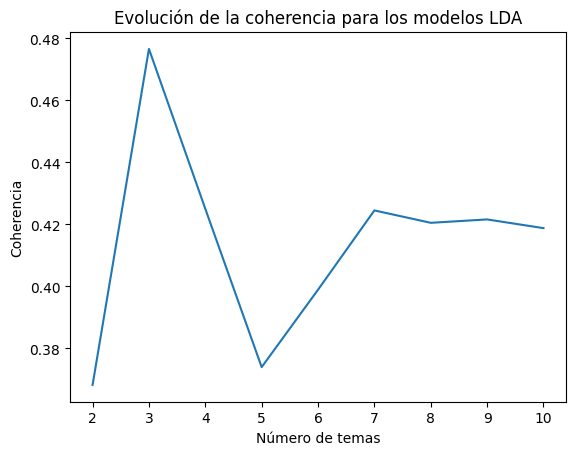

In [33]:
# Visualizar la evoluci√≥n de la coherencia para los modelos LDA
plt.plot(range(mintopics_lda, maxtopics_lda+1), coherencias_lda)
plt.xlabel('N√∫mero de temas')
plt.ylabel('Coherencia')
plt.title('Evoluci√≥n de la coherencia para los modelos LDA')
plt.show()

Modelo LDA con 2 temas:
Coherencia: 0.3682445020533398


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


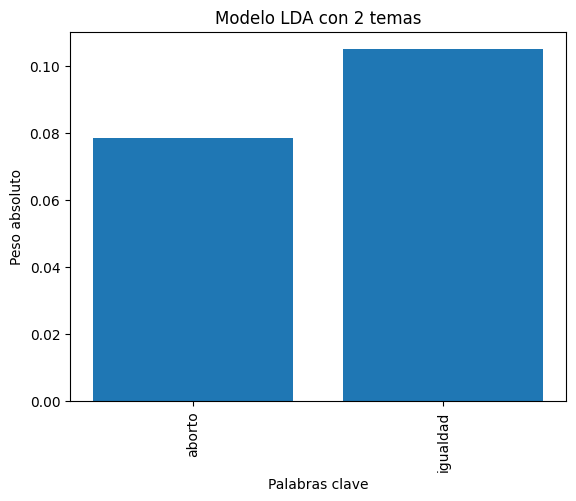



Modelo LDA con 3 temas:
Coherencia: 0.47662094637756675


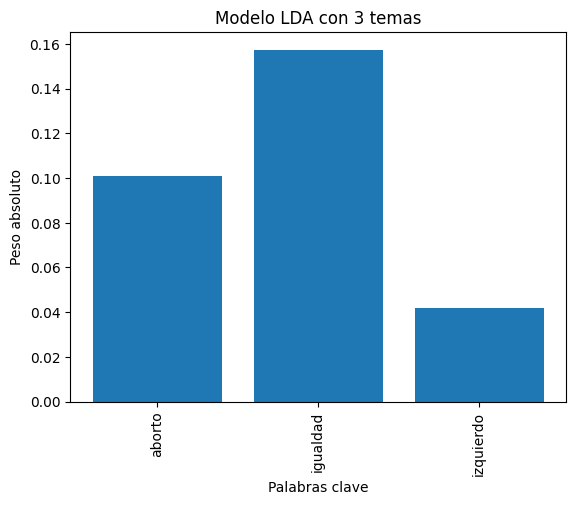



Modelo LDA con 4 temas:
Coherencia: 0.4250539685555704


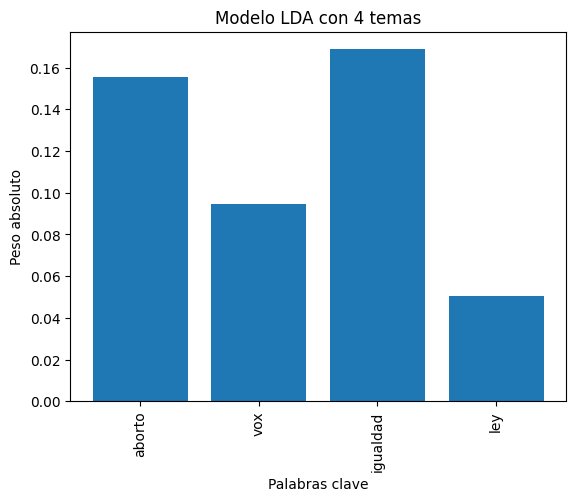



Modelo LDA con 5 temas:
Coherencia: 0.3739821427492983


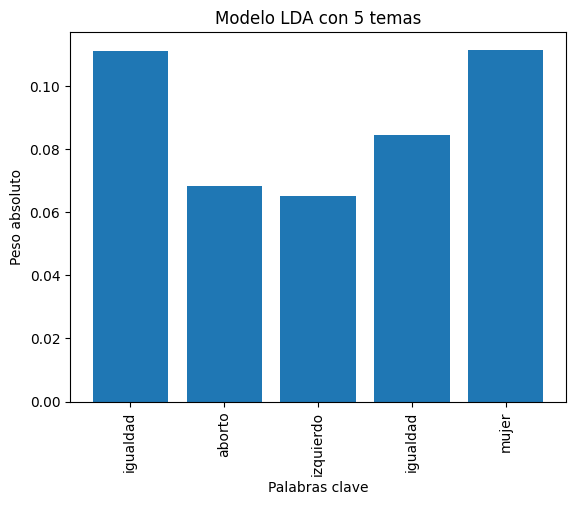



Modelo LDA con 6 temas:
Coherencia: 0.3989487479256261


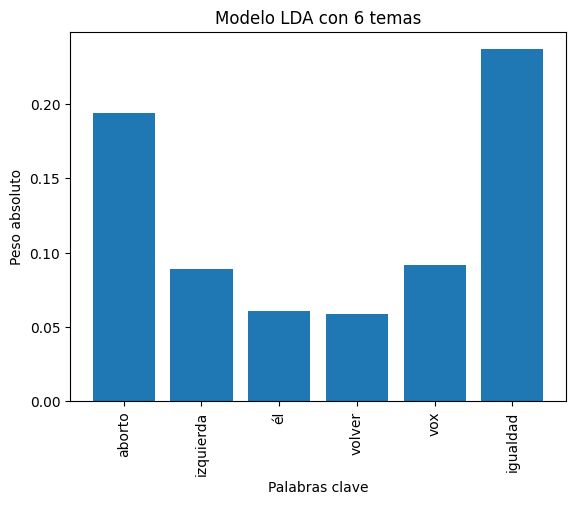



Modelo LDA con 7 temas:
Coherencia: 0.4245313136802271


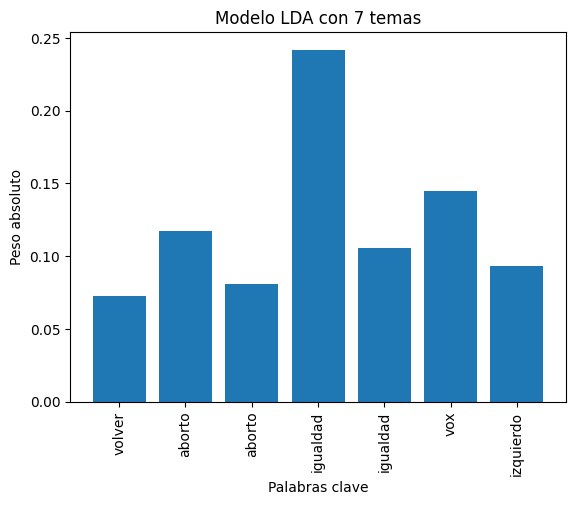



Modelo LDA con 8 temas:
Coherencia: 0.4205322785183057


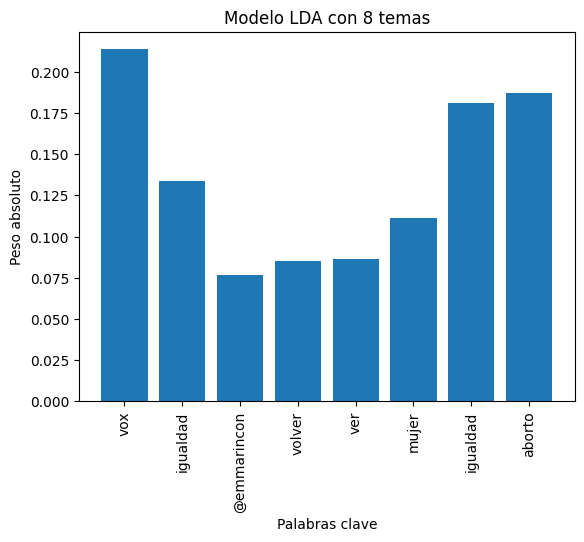



Modelo LDA con 9 temas:
Coherencia: 0.4216256215515467


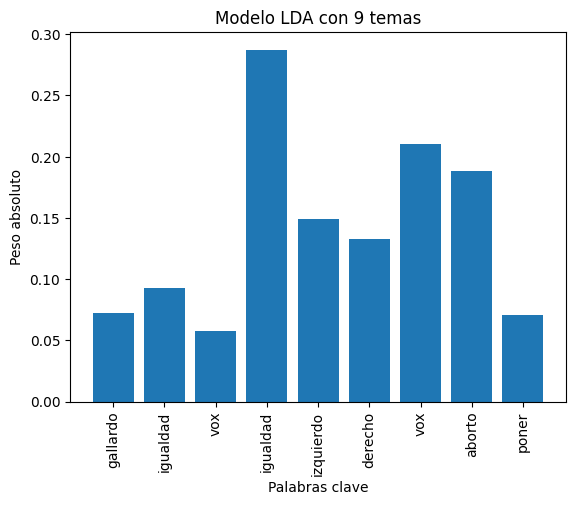



Modelo LDA con 10 temas:
Coherencia: 0.41881542553778306


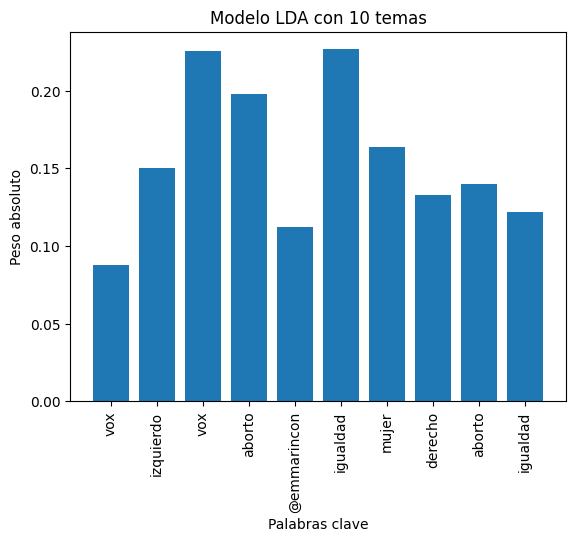

In [34]:
from itertools import zip_longest

# Imprimir coherencia y mostrar visualizaci√≥n para modelos LDA
for i, modelo_lda in enumerate(modelos_lda):
    print(f"Modelo LDA con {i+mintopics_lda} temas:")
    print(f"Coherencia: {coherencias_lda[i]}")
    topics = modelo_lda.show_topics(formatted=False)
    words = [[word for word, _ in topic[1]] for topic in topics]
    weights = [[weight for _, weight in topic[1]] for topic in topics]
    # Asegurar que las listas words y weights tengan la misma longitud
    max_len = max(len(words), len(weights))
    words = list(zip_longest(*words, fillvalue=''))
    weights = list(zip_longest(*weights, fillvalue=0.0))
    # Convertir los valores de los pesos a valores absolutos
    weights = [[abs(weight) for weight in topic_weights] for topic_weights in weights]
    fig, ax = plt.subplots()
    ax.bar(range(max_len), weights[0])  # Usar weights[0] en lugar de weights[i]
    ax.set_xticks(range(max_len))
    ax.set_xticklabels(words[0], rotation='vertical')  # Usar words[0] en lugar de words[i]
    plt.xlabel('Palabras clave')
    plt.ylabel('Peso absoluto')
    plt.title(f'Modelo LDA con {i+mintopics_lda} temas')
    plt.show()
    print("\n")



####LSI

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


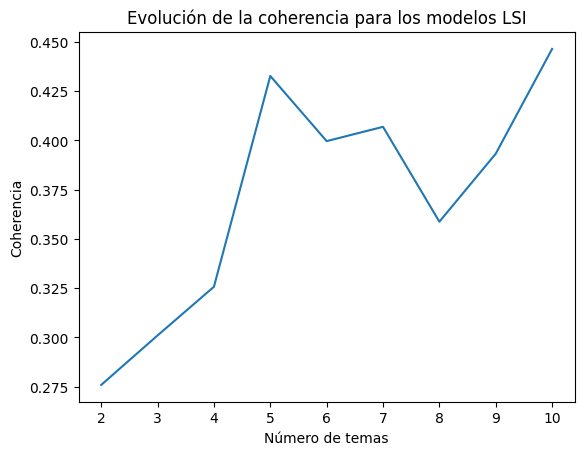

In [35]:
# Visualizar la evoluci√≥n de la coherencia para los modelos LSI
plt.plot(range(mintopics_lsi, maxtopics_lsi+1), coherencias_lsi)
plt.xlabel('N√∫mero de temas')
plt.ylabel('Coherencia')
plt.title('Evoluci√≥n de la coherencia para los modelos LSI')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Modelo LSI con 2 temas:
Coherencia: 0.2758454893926119


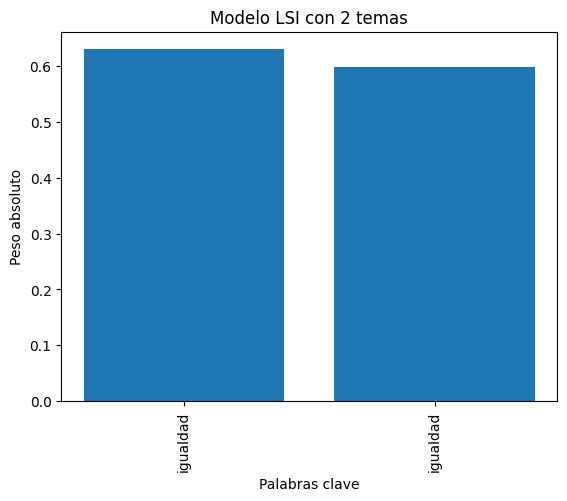



Modelo LSI con 3 temas:
Coherencia: 0.3009599956746125


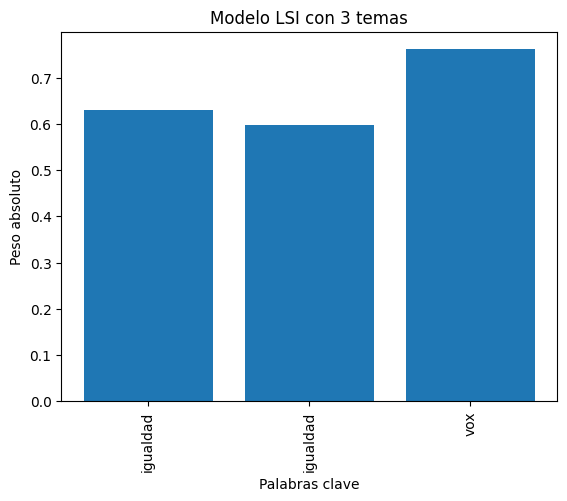



Modelo LSI con 4 temas:
Coherencia: 0.3256679252453031


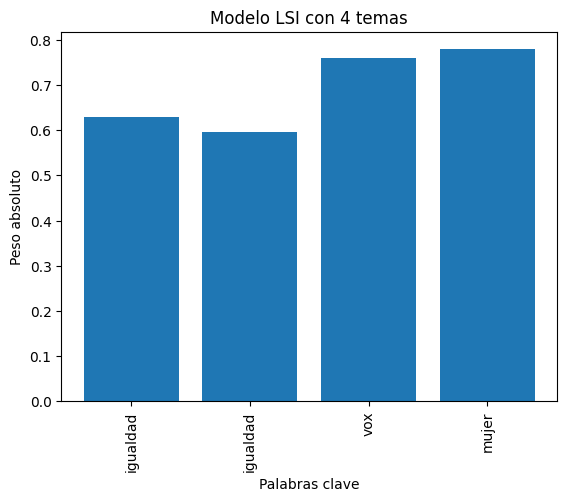



Modelo LSI con 5 temas:
Coherencia: 0.4326487265324543


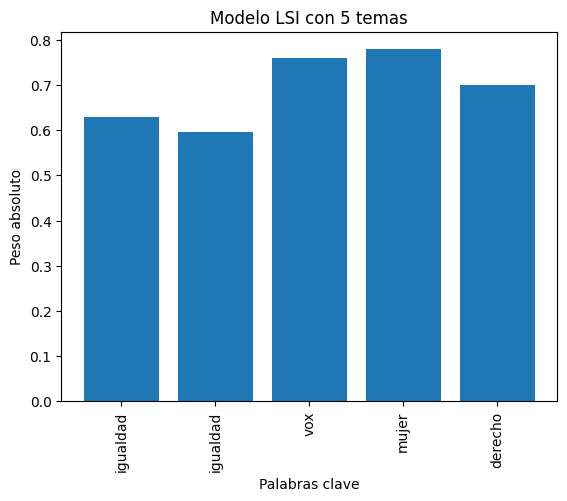



Modelo LSI con 6 temas:
Coherencia: 0.3995835901487586


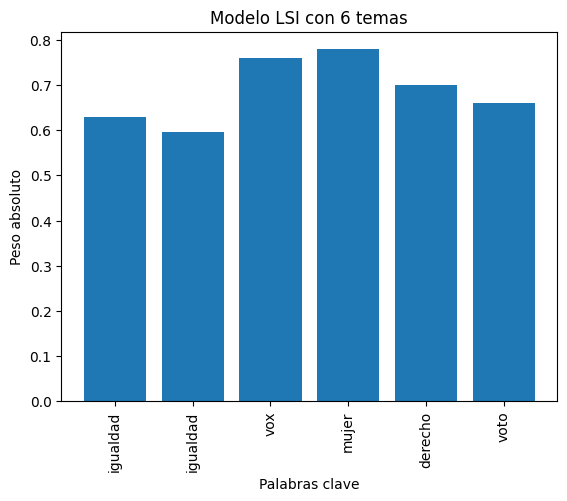



Modelo LSI con 7 temas:
Coherencia: 0.40683541194203293


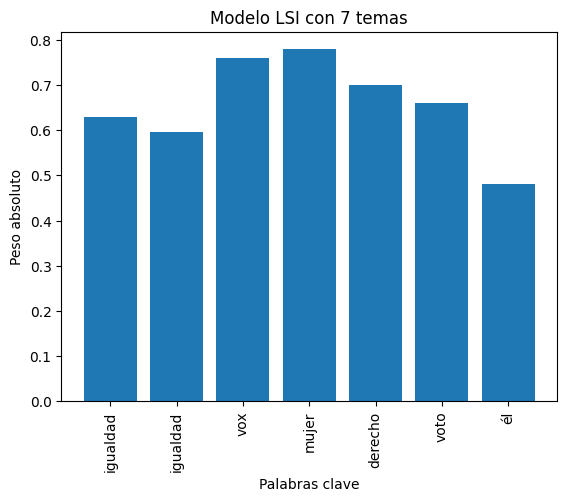



Modelo LSI con 8 temas:
Coherencia: 0.35869339383867127


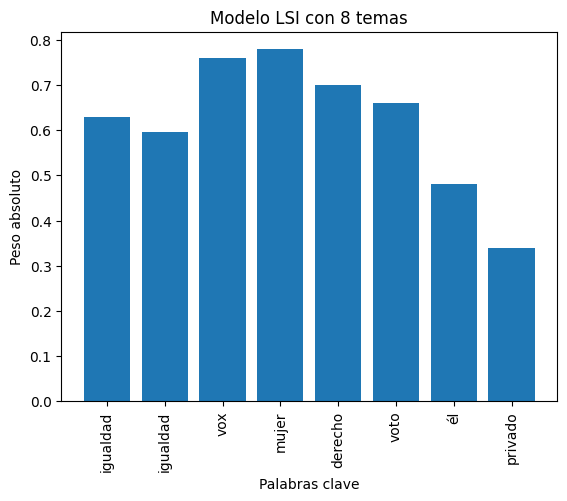



Modelo LSI con 9 temas:
Coherencia: 0.3931933350453315


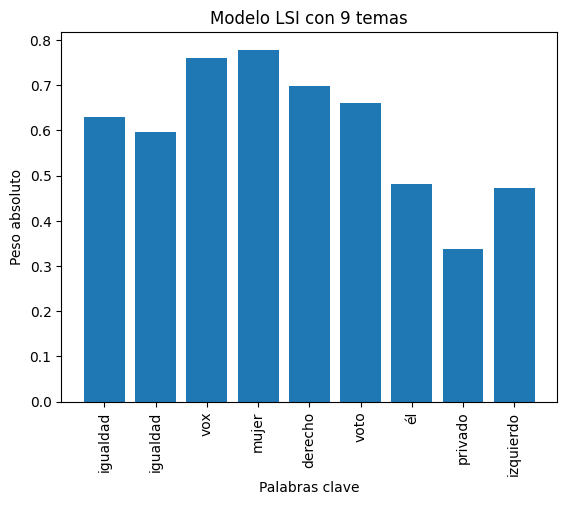



Modelo LSI con 10 temas:
Coherencia: 0.4463773620791205


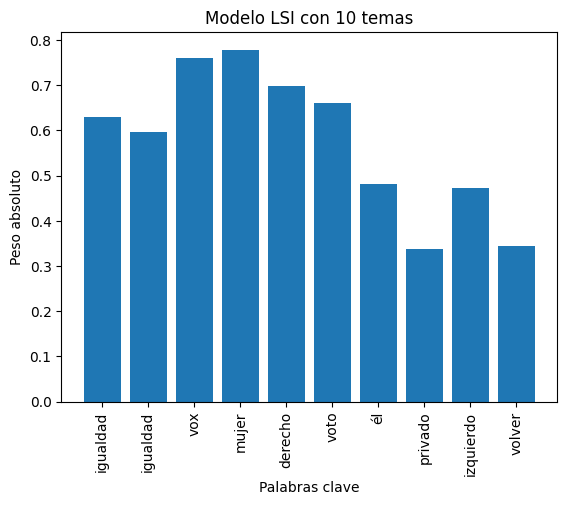

In [36]:
from itertools import zip_longest
from gensim.models import LsiModel

# Imprimir coherencia y mostrar visualizaci√≥n para modelos LSI
for i, modelo_lsi in enumerate(modelos_lsi):
    print(f"Modelo LSI con {i+mintopics_lsi} temas:")
    print(f"Coherencia: {coherencias_lsi[i]}")
    topics = modelo_lsi.show_topics(formatted=False)
    words = [[word for word, _ in topic[1]] for topic in topics]
    weights = [[weight for _, weight in topic[1]] for topic in topics]
    # Asegurar que las listas words y weights tengan la misma longitud
    max_len = max(len(words), len(weights))
    words = list(zip_longest(*words, fillvalue=''))
    weights = list(zip_longest(*weights, fillvalue=0.0))
    # Convertir los valores de los pesos a valores absolutos
    weights = [[abs(weight) for weight in topic_weights] for topic_weights in weights]
    fig, ax = plt.subplots()
    ax.bar(range(max_len), weights[0])  # Usar weights[0] en lugar de weights[i]
    ax.set_xticks(range(max_len))
    ax.set_xticklabels(words[0], rotation='vertical')  # Usar words[0] en lugar de words[i]
    plt.xlabel('Palabras clave')
    plt.ylabel('Peso absoluto')
    plt.title(f'Modelo LSI con {i+mintopics_lsi} temas')
    plt.show()
    print("\n")


#Algunas conclusiones
* Coherencia: La coherencia es una medida de calidad de los temas generados por el modelo LDA. Cuanto mayor sea el valor de coherencia, mejor ser√° la interpretaci√≥n y estructura de los temas. En este caso, se observa que a medida que aumenta el n√∫mero de temas, la coherencia tiende a aumentar hasta cierto punto y luego disminuye. Esto sugiere que puede haber un n√∫mero √≥ptimo de temas para tu conjunto de datos.

* N√∫mero de temas: Al evaluar los modelos LDA con diferentes n√∫meros de temas, es importante encontrar un equilibrio entre la calidad de los temas y la interpretaci√≥n de los mismos. Si hay muy pocos temas, es posible que no capturen la diversidad y complejidad de los documentos. Por otro lado, si hay demasiados temas, es posible que se vuelvan redundantes o dif√≠ciles de interpretar. Es posible que el n√∫mero √≥ptimo de temas se encuentre en el rango donde la coherencia es m√°s alta y los temas son interpretables.

* Interpretaci√≥n de los temas: Adem√°s de la coherencia, es importante examinar los t√©rminos clave dentro de cada tema para evaluar la interpretabilidad de los mismos. Al revisar los t√©rminos m√°s relevantes en cada tema, puedes obtener una idea de los conceptos o temas generales que se est√°n discutiendo en tus documentos.

* Visualizaci√≥n: Aunque no pudimos generar los gr√°ficos de PyLDAvis en este entorno y tuve que exportar el gr√°fico como un archivo HTML, la visualizaci√≥n de los modelos LDA es una herramienta √∫til para explorar y comprender mejor los temas generados. Los gr√°ficos de burbujas, los paneles de t√©rminos y las distribuciones de t√©rminos y documentos pueden proporcionar una representaci√≥n visual de los temas y sus relaciones.

En resumen, el an√°lisis de los modelos LDA puede ayudarte a descubrir patrones, temas y relaciones ocultas en tus documentos. Al evaluar diferentes configuraciones de modelos y analizar los resultados, puedes obtener una mejor comprensi√≥n de tus datos y extraer informaci√≥n valiosa.

Para interpretar los resultados, puedes seguir estos pasos:

Observa las palabras clave en el eje x: Las etiquetas en el eje x corresponden a las palabras clave m√°s relevantes asociadas a cada tema. Estas palabras pueden darte una idea general de qu√© trata cada tema.

Examina la altura de las barras: La altura de cada barra indica la importancia relativa del tema en el corpus. Cuanto m√°s alta sea la barra, m√°s dominante es ese tema en el corpus de texto.

Compara las barras: Puedes comparar las alturas de las barras para tener una idea de qu√© temas son m√°s importantes o prominentes en comparaci√≥n con otros. Las barras m√°s altas representan los temas m√°s relevantes en el corpus.

Observa la superposici√≥n o separaci√≥n de las barras: Si las barras est√°n muy separadas entre s√≠, indica que los temas son distintos y se pueden clasificar de manera m√°s clara. Por otro lado, si las barras se superponen o est√°n muy cercanas, puede indicar una mayor similitud entre los temas y una mayor dificultad para distinguirlos.

Recuerda que la interpretaci√≥n de los resultados del modelo LSI es subjetiva y depende del contexto y los datos utilizados. Puedes utilizar estos resultados como una gu√≠a inicial para comprender los temas principales en tu corpus de texto y explorar m√°s a fondo cada tema en funci√≥n de las palabras clave y la importancia relativa.

##guardar los resultados obtenidos

In [43]:
import csv

# Guardar resultados en archivo CSV
resultados_lda = []
for i, modelo_lda in enumerate(modelos_lda):
    resultado = {
        'Modelo': f"Modelo LDA con {i+mintopics_lda} temas",
        'Coherencia': coherencias_lda[i]
    }
    resultados_lda.append(resultado)

resultados_lsi = []
for i, modelo_lsi in enumerate(modelos_lsi):
    resultado = {
        'Modelo': f"Modelo LSI con {i+mintopics_lsi} temas",
        'Coherencia': coherencias_lsi[i]
    }
    resultados_lsi.append(resultado)

# Guardar resultados de LDA en CSV
nombre_archivo_lda = 'resultados_lda.csv'
with open(nombre_archivo_lda, 'w', newline='') as archivo:
    campos = ['Modelo', 'Coherencia']
    escritor = csv.DictWriter(archivo, fieldnames=campos)
    escritor.writeheader()
    escritor.writerows(resultados_lda)

# Guardar resultados de LSI en CSV
nombre_archivo_lsi = 'resultados_lsi.csv'
with open(nombre_archivo_lsi, 'w', newline='') as archivo:
    campos = ['Modelo', 'Coherencia']
    escritor = csv.DictWriter(archivo, fieldnames=campos)
    escritor.writeheader()
    escritor.writerows(resultados_lsi)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
import csv

def guardar_detalle_modelos_csv(modelos, coherencias, nombre_archivo, mintopics):
    with open(nombre_archivo, 'w', newline='', encoding='utf-8') as archivo:
        campos = ['Modelo', 'Coherencia', 'N√∫mero del Tema', 'Palabras Clave']
        escritor = csv.DictWriter(archivo, fieldnames=campos)
        escritor.writeheader()

        for i, (modelo, coherencia) in enumerate(zip(modelos, coherencias)):
            for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
                palabras_clave = ", ".join([f"{palabra} ({peso:.3f})" for palabra, peso in tema])
                escritor.writerow({
                    'Modelo': f"Modelo con {i + mintopics} temas",
                    'Coherencia': coherencia,
                    'N√∫mero del Tema': tema_id,
                    'Palabras Clave': palabras_clave
                })

# Guardar detalles de modelos LDA en CSV
guardar_detalle_modelos_csv(modelos_lda, coherencias_lda, 'detalle_resultados_lda.csv', mintopics_lda)

# Guardar detalles de modelos LSI en CSV
guardar_detalle_modelos_csv(modelos_lsi, coherencias_lsi, 'detalle_resultados_lsi.csv', mintopics_lsi)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Preparar archivo para Gephi
Gephi es una herramienta de visualizaci√≥n y exploraci√≥n de grafos para todo tipo de redes y sistemas complejos, din√°micos e interconectados. Es de c√≥digo abierto y permite a los usuarios interactuar con la representaci√≥n gr√°fica de redes, manipular la estructura, forma y varios atributos de la red, y proporciona herramientas de an√°lisis para identificar patrones, flujos o din√°micas dentro de la red.

En el contexto de Gephi, una red o grafo se compone de nodos (tambi√©n llamados v√©rtices) y aristas (tambi√©n llamadas enlaces o bordes). Los nodos representan entidades o elementos individuales dentro de la red, mientras que las aristas representan las relaciones o conexiones entre esos nodos.
Tipos de Archivos:
Para trabajar con Gephi, a menudo necesitar√°s preparar y cargar dos tipos principales de archivos: nodos y aristas. Estos archivos definen la estructura de la red que quieres analizar y visualizar.

Archivo de Nodos:

Este archivo contiene informaci√≥n sobre los nodos en la red.
Cada fila representa un nodo √∫nico.
Los atributos comunes incluidos en el archivo de nodos pueden ser el ID del nodo (√∫nico para cada nodo), el nombre o etiqueta del nodo, y posiblemente otras caracter√≠sticas o m√©tricas espec√≠ficas del nodo, como el tama√±o, color, o medidas de centralidad, dependiendo de lo que quieras analizar o visualizar.
Archivo de Aristas:

Este archivo describe las relaciones entre los nodos.
Cada fila en el archivo de aristas representa una conexi√≥n √∫nica entre dos nodos.
Los atributos comunes en este archivo incluyen el ID o nombre del nodo de origen, el ID o nombre del nodo de destino, y posiblemente el peso de la arista, que puede representar la fuerza o capacidad de la conexi√≥n, as√≠ como otros atributos espec√≠ficos de la relaci√≥n.

 Ambos tipos de archivos suelen estar en formatos que permiten representar datos tabulares, como CSV (Valores Separados por Comas).

###LDA

####Nodos

In [45]:
def generar_nodos_lda_csv(modelos_lda, archivo_nodos_lda):
    nodos = set()
    for modelo in modelos_lda:
        for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
            nodos.add((f"Tema LDA {tema_id}", "Tema"))  # A√±adir el tema como nodo
            for palabra, _ in tema:
                nodos.add((palabra, "Palabra clave"))  # A√±adir palabras clave como nodos

    with open(archivo_nodos_lda, 'w', newline='', encoding='utf-8') as archivo:
        campos = ['Id', 'Label', 'Type']
        escritor = csv.DictWriter(archivo, fieldnames=campos)
        escritor.writeheader()
        for nodo, tipo in nodos:
            escritor.writerow({'Id': nodo, 'Label': nodo, 'Type': tipo})

generar_nodos_lda_csv(modelos_lda, 'nodos_lda.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####Aristas

In [46]:
def generar_aristas_lda_csv(modelos_lda, archivo_aristas_lda):
    aristas = []
    for modelo in modelos_lda:
        for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
            tema_label = f"Tema LDA {tema_id}"
            for palabra, peso in tema:
                aristas.append((tema_label, palabra, peso))

    with open(archivo_aristas_lda, 'w', newline='', encoding='utf-8') as archivo:
        campos = ['Source', 'Target', 'Weight']
        escritor = csv.DictWriter(archivo, fieldnames=campos)
        escritor.writeheader()
        for source, target, weight in aristas:
            escritor.writerow({'Source': source, 'Target': target, 'Weight': weight})

generar_aristas_lda_csv(modelos_lda, 'aristas_lda.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###LSI

####Nodos

In [47]:
def generar_nodos_lsi_csv(modelos_lsi, archivo_nodos_lsi):
    nodos = set()
    for modelo in modelos_lsi:
        for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
            nodos.add((f"Tema LSI {tema_id}", "Tema"))  # A√±adir el tema como nodo
            for palabra, _ in tema:
                nodos.add((palabra, "Palabra clave"))  # A√±adir palabras clave como nodos

    with open(archivo_nodos_lsi, 'w', newline='', encoding='utf-8') as archivo:
        campos = ['Id', 'Label', 'Type']
        escritor = csv.DictWriter(archivo, fieldnames=campos)
        escritor.writeheader()
        for nodo, tipo in nodos:
            escritor.writerow({'Id': nodo, 'Label': nodo, 'Type': tipo})

generar_nodos_lsi_csv(modelos_lsi, 'nodos_lsi.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####Aristas

In [48]:
def generar_aristas_lsi_csv(modelos_lsi, archivo_aristas_lsi):
    aristas = []
    for modelo in modelos_lsi:
        for tema_id, tema in modelo.show_topics(num_topics=-1, num_words=10, formatted=False):
            tema_label = f"Tema LSI {tema_id}"
            for palabra, peso in tema:
                aristas.append((tema_label, palabra, peso))

    with open(archivo_aristas_lsi, 'w', newline='', encoding='utf-8') as archivo:
        campos = ['Source', 'Target', 'Weight']
        escritor = csv.DictWriter(archivo, fieldnames=campos)
        escritor.writeheader()
        for source, target, weight in aristas:
            escritor.writerow({'Source': source, 'Target': target, 'Weight': weight})

generar_aristas_lsi_csv(modelos_lsi, 'aristas_lsi.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Modelo de hatespeech

##Paso 1: Crear y aplicar funciones de detecci√≥n a los tuits


###Dirigido a personas

In [17]:
import re

def tweettargetedperson(tweet):
    # 0 no 1 s√≠ dirigido a personas
    tweetlist = tweet.split()
    found = 0
    for word in tweetlist:
        if re.match(r"^@\w+", word):
            found = 1
    return found

#En esta versi√≥n de la funci√≥n, se utiliza el patr√≥n de expresi√≥n regular ^@\w+ para buscar un nombre de usuario de Twitter que comienza con "@". La expresi√≥n ^ indica el comienzo de la cadena, por lo que este patr√≥n solo coincidir√° con los tokens que comiencen con "@". Si se encuentra un token que coincide con este patr√≥n, se establece la variable found en 1 y se devuelve al final de la funci√≥n.

###Dirigido a minor√≠as

In [18]:
def tweettargetedgroup(tweet):
  #0 no, 1 s√≠ dirigido a minor√≠as
  hate=analyzer_hate.predict(tweet)
  hateoutput=hate.output
  if "targeted" in hateoutput:
    result=1
  elif "hateful" in hateoutput:
    result=1
  elif "aggressive" in hateoutput:
    result=1
  else:
    result=0
  return result

###Presencia de emoticonos

In [19]:
def emojis(tweet):
  total_emojis=0
  for character in tweet:
    if character in emoji.UNICODE_EMOJI['es']:
      total_emojis+=1
  try:
    relation=total_emojis/len(tweet.split())
  except ZeroDivisionError:
    relation=0.0
  return relation

###caracteres repetidos innecesariamente

In [20]:
import re

def detectar_caracteres_repetidos(texto):
    # Busca caracteres repetidos m√°s de 2 veces
    if re.search(r'(.)\1{2,}', texto):
        return 1
    else:
        return 0


###n√∫meros y caracteres especiales

In [21]:
import re

def detectar_numeros_caracteres_especiales(texto):
    # Divide el texto en segmentos, excluyendo URLs y menciones para la detecci√≥n
    segmentos = re.split(r'@\w+|http\S+|www\.\S+', texto)

    # Patr√≥n mejorado para detectar inserciones de n√∫meros o caracteres especiales
    patron = r'\b\w*[^\w\s]+\w*\b'

    for segmento in segmentos:
        if re.search(patron, segmento, re.IGNORECASE):
            return 1
    return 0


###separaci√≥n de letras

In [22]:
def detectar_separacion_letras(texto):
    # Busca letras de palabras separadas por espacios innecesariamente
      if re.search(r'\b(\w\s+){2,}\w\b', texto):
        return 1
      else:
        return 0

###Discurso de odio

> spanlp es una biblioteca de Python dise√±ada para detectar, censurar y limpiar groser√≠as, vulgaridades, palabras de odio, racismo, xenofobia y bullying en textos escritos en espa√±ol.
Cubre palabras de m√°s de 20 pa√≠ses de habla hispana, incluyendo Argentina, Bolivia, Chile, Colombia, Espa√±a, M√©xico, y muchos m√°s


> Casos de Uso:

*   Censurar vulgaridades en texto.
*   Detectar y censurar vulgaridades en salas de chat en l√≠nea.
*   Encontrar y censurar frases y palabras de odio, racismo, xenofobia, bullying.
*   Censurar comentarios groseros o insultos en blogs, aplicaciones web o sitios web.
*   Limpiar textos antes de ser publicados.
*   Detectar y eliminar vulgaridades en textos para ni√±os.
*   Limpiar bases de datos con mucho texto.


Modificar o normalizar el texto antes de pasarlo a spanlp o cualquier otra herramienta de detecci√≥n podr√≠a ser la mejor estrategia. Esto se debe a que:

* Maximizas la capacidad de detecci√≥n de la herramienta al reducir las variaciones en c√≥mo se pueden presentar las palabras ofensivas o el discurso de odio.
* Simplificas el texto para adaptarlo a lo que la herramienta puede procesar m√°s efectivamente.

Para la implementaci√≥n, se combinan las funciones de normalizaci√≥n en una funci√≥n de preprocesamiento para aplicarla antes de pasar spanlp.

In [23]:
emoticonos_a_palabras = {
    ":)": "feliz",
    ":D": "muy feliz",
    "XD": "risa",
    ":(": "triste",
    ":'(": "llorando",
    ":P": "burla",
    ";)": "gui√±o",
    ">:(": "enojado",
    "üòÇ": "risa",
    "üò¢": "llorando",
    "üò°": "enojado",
    "ü§Æ": "asco",
    "üí©": "caca",
    "üòç": "enamorado",
    "ü•∫": "rogando",
    "üò±": "sorprendido",
    "üëø": "diablo",
    "ü§°": "payaso",
    "üëç": "aprobaci√≥n",
    "üëé": "desaprobaci√≥n",
    "üôè": "rogando",
    "üíî": "coraz√≥n roto",
    "‚ù§Ô∏è": "amor",
    "üò¥": "sue√±o",
    "ü§î": "pensativo",
    "üéâ": "celebraci√≥n",
    "ü§ñ": "robot",
    "üëª": "fantasma",
    "üí§": "sue√±o",
    "üî•": "fuego",
    # A√±ade m√°s mapeos seg√∫n sea necesario
}
def sustituir_emoticonos(texto):
    for emoticono, palabra in emoticonos_a_palabras.items():
        texto = texto.replace(emoticono, palabra)
    return texto

In [24]:
# Las funciones de detecci√≥n ahora devolver√°n texto modificado o el original
def modificar_caracteres_repetidos(texto):
    if re.search(r'(.)\1{2,}', texto):
        texto = re.sub(r'(.)\1{2,}', r'\1', texto)  # Reduce repetici√≥n excesiva
    return texto

def modificar_numeros_caracteres_especiales(texto):
    texto = re.sub(r'[\d@#$%^&*()_+=]', '', texto)  # Elimina n√∫meros y caracteres especiales
    return texto

def modificar_separacion_letras(texto):
    texto = re.sub(r'\b(\w\s+){2,}\w\b', '', texto)  # Cierra espacios innecesarios
    return texto

In [25]:
def preprocesar_texto(texto):
    texto = sustituir_emoticonos(texto)  # Sustituye emoticonos
    texto = modificar_caracteres_repetidos(texto)
    texto = modificar_numeros_caracteres_especiales(texto)
    texto = modificar_separacion_letras(texto)
    return texto


In [26]:
!pip install spanlp


In [27]:
from spanlp.palabrota import Palabrota

def detectar_discurso_odio_con_preprocesamiento(frase):
    frase_preprocesada = preprocesar_texto(frase)
    palabrota = Palabrota()
    contiene_palabrota = palabrota.contains_palabrota(frase_preprocesada)

    # Devuelve 1 si se detecta discurso de odio, de lo contrario 0
    return 1 if contiene_palabrota else 0

###Discurso de odio II

In [ ]:
!pip install spanish_nlp

In [36]:
from spanish_nlp import preprocess, classifiers

# Funci√≥n para detectar discurso de odio con traducci√≥n de emoticonos y emojis, y eliminaci√≥n de hashtags
def detectar_discurso_odio_mejorado(texto):
    # Inicializar el m√≥dulo de preprocesamiento con ajustes adicionales
    sp = preprocess.SpanishPreprocess(
        lower=True,
        remove_url=True,
        remove_hashtags=True,  # Eliminar hashtags
        split_hashtags=False,
        normalize_breaklines=True,
        remove_emoticons=False,
        remove_emojis=False,
        convert_emoticons=True,  # Convertir emoticonos a texto
        convert_emojis=True,  # Convertir emojis a texto
        normalize_inclusive_language=True,
        reduce_spam=True,
        remove_vowels_accents=True,
        remove_multiple_spaces=True,
        remove_punctuation=True,
        remove_unprintable=True,
        remove_numbers=False,  # Conservar n√∫meros para detectar manipulaciones como "c0√±0"
        remove_stopwords=False,
        stopwords_list=None,
        lemmatize=False,
        stem=False,
        remove_html_tags=True,
    )

    # Preprocesar el texto
    texto_preprocesado = sp.transform(texto, debug=False)

    # Inicializar el clasificador de discurso de odio
    sc = classifiers.SpanishClassifier(model_name="hate_speech", device='cpu')

    # Realizar la clasificaci√≥n
    predicciones = sc.predict(texto_preprocesado)

    # Imprimir las predicciones
    for clave, valor in predicciones.items():
        print(f"{clave}: {valor:.4f}")

    return predicciones

# Ejemplo de uso
texto = "LAS MUJERES Y GAYS DEBERIAN SER EXTERMINADOS üò† #Injusticia"
print(detectar_discurso_odio_mejorado(texto))


ModuleNotFoundError: No module named 'spanish_nlp'

###abreviaturas

In [28]:
def detectar_abreviaturas_insultos(texto):
    # Lista corregida y simplificada de abreviaturas de insultos conocidos
    abreviaturas_insultos = [
        'hdp',  # hijo de puta
        'hp',  # hijo de puta
        'ctm',  # concha tu madre
        'ptm',  # puta tu madre
        'lpqtp',  # la puta que te pari√≥
        'nmms',  # no mames
        'jdp',  # jodido pendejo
        'atpc',  # a tomar por culo
        'mier', #mierda
        # A√±ade m√°s abreviaturas seg√∫n sea necesario
    ]

    texto_normalizado = texto.lower()

    # Verifica si alguna abreviatura de insulto se encuentra en el texto
    for abreviatura in abreviaturas_insultos:
        if abreviatura in texto_normalizado:
            return 1  # Devuelve 1 si se encuentra alguna abreviatura de insulto

    return 0  # Devuelve 0 si no se encuentra ninguna abreviatura de insulto



## Paso 2: Carga el archivo con los tuits seleccionados y aplicar las funciones

In [1]:
pip install pandas==1.3.3


In [44]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('/content/tweetsoriginales.csv', header=None)

#A√±adir el encabezado 'Tweet' a la primera columna
df.columns = ['Tweet']

#Guardar el DataFrame con el nuevo encabezado de vuelta a un archivo CSV
df.to_csv('/content/tweetsoriginales.csv', index=False)

# Seleccionar aleatoriamente 300 tuits
df_seleccionados = df.sample(n=300, random_state=1) # Usar random_state para reproducibilidad

# Aplicar las funciones solo a los tuits seleccionados
df_seleccionados['Dirigido a personas'] = df_seleccionados['Tweet'].apply(tweettargetedperson)
df_seleccionados['Dirigido a minor√≠as'] = df_seleccionados['Tweet'].apply(tweettargetedgroup)
df_seleccionados['Emoticonos'] = df_seleccionados['Tweet'].apply(emojis)
df_seleccionados['Caracteres repetidos'] = df_seleccionados['Tweet'].apply(detectar_caracteres_repetidos)
df_seleccionados['N√∫meros y caracteres especiales'] = df_seleccionados['Tweet'].apply(detectar_numeros_caracteres_especiales)
df_seleccionados['Separaci√≥n de letras'] = df_seleccionados['Tweet'].apply(detectar_separacion_letras)
df_seleccionados['Discurso de odio'] = df_seleccionados['Tweet'].apply(detectar_discurso_odio_con_preprocesamiento)
df_seleccionados['Abreviaturas de insultos'] = df_seleccionados['Tweet'].apply(detectar_abreviaturas_insultos)

# A√±adir la nueva columna "Algolingua" con valores nulos como marcador de posici√≥n
df_seleccionados['Algolingua'] = None

# Guardar los tuits seleccionados a un archivo Excel
df_seleccionados.to_excel('choicetweets_algolingua.xlsx', index=False)

# Identificar los tuits no seleccionados
df_no_seleccionados = df.drop(df_seleccionados.index)

# Guardar los tuits no seleccionados a otro archivo Excel
df_no_seleccionados.to_excel('NOTchoicedtweets_algolingua.xlsx', index=False)


##Paso 3: Entrenamiento de regresi√≥n log√≠stica (70%) y evaluaci√≥n (30%)

Precisi√≥n del modelo: 0.6333333333333333


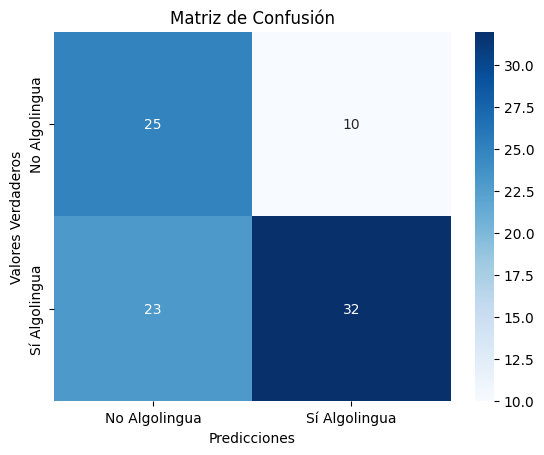

Matriz de confusi√≥n:
[[25 10]
 [23 32]]
Verdaderos Negativos (VN): 25
Falsos Positivos (FP): 10
Falsos Negativos (FN): 23
Verdaderos Positivos (VP): 32


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel, asumiendo que 'Algolingua' ya est√° correctamente categorizada
df = pd.read_excel('targeted_choicetweets_algolingua.xlsx')

# Suponiendo que la primera columna es 'Tweet' y no se usar√° como variable independiente
X = df.drop(['Tweet', 'Algolingua'], axis=1)  # Aseg√∫rate de excluir correctamente la columna 'Tweet'
y = df['Algolingua']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo de regresi√≥n log√≠stica
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar la precisi√≥n del modelo
print("Precisi√≥n del modelo:", accuracy_score(y_test, y_pred))

# Generar y visualizar la matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Algolingua', 'S√≠ Algolingua'], yticklabels=['No Algolingua', 'S√≠ Algolingua'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusi√≥n')
plt.show()
# Imprimir los valores de la matriz de confusi√≥n
print("Matriz de confusi√≥n:")
print(conf_matrix)

# Imprimir los valores descriptivos de la matriz de confusi√≥n
verdaderos_negativos, falsos_positivos, falsos_negativos, verdaderos_positivos = conf_matrix.ravel()
print(f'Verdaderos Negativos (VN): {verdaderos_negativos}')
print(f'Falsos Positivos (FP): {falsos_positivos}')
print(f'Falsos Negativos (FN): {falsos_negativos}')
print(f'Verdaderos Positivos (VP): {verdaderos_positivos}')

Bas√°ndonos en los resultados obtenidos:

Precisi√≥n del Modelo (0.6333 o 63.33%): Este valor indica que el modelo ha clasificado correctamente el 63.33% de los casos en el conjunto de prueba. Aunque esto es mejor que una clasificaci√≥n aleatoria, hay margen de mejora, especialmente si consideramos tareas de clasificaci√≥n donde se espera una alta precisi√≥n.

Matriz de Confusi√≥n:

Verdaderos Negativos (VN): 25 - El modelo predijo correctamente 25 casos como negativos (clase 0), es decir, predijo correctamente que 25 tuits no pertenecen a la categor√≠a 'Algolingua'.
Falsos Positivos (FP): 10 - El modelo incorrectamente predijo 10 casos como positivos (clase 1) cuando en realidad son negativos (clase 0), lo que puede ser problem√°tico dependiendo de la importancia relativa de evitar falsos positivos en tu aplicaci√≥n.
Falsos Negativos (FN): 23 - El modelo no logr√≥ identificar 23 casos positivos (clase 1), clasific√°ndolos err√≥neamente como negativos. Esto podr√≠a ser un indicador de que el modelo es conservador, posiblemente perdiendo casos relevantes.
Verdaderos Positivos (VP): 32 - El modelo identific√≥ correctamente 32 casos como positivos, lo que sugiere que tiene capacidad para reconocer correctamente la clase de inter√©s en ciertos casos.
Conclusiones:
Sensibilidad y Especificidad: La matriz sugiere que el modelo tiene una sensibilidad (capacidad para detectar verdaderos positivos) y especificidad (capacidad para detectar verdaderos negativos) balanceadas pero no √≥ptimas. La sensibilidad se calcula como VP / (VP + FN) = 32 / (32 + 23) ‚âà 0.58, y la especificidad como VN / (VN + FP) = 25 / (25 + 10) ‚âà 0.71. Esto indica que el modelo es relativamente m√°s eficaz en identificar negativos correctamente que positivos.

Equilibrio entre FP y FN: Existe un equilibrio entre los Falsos Positivos y los Falsos Negativos, pero ambos n√∫meros son relativamente altos, lo que indica que hay margen de mejora en la capacidad del modelo para distinguir entre las clases.

Posibles Mejoras: Para mejorar la precisi√≥n del modelo, podr√≠as considerar t√©cnicas como la selecci√≥n de caracter√≠sticas para identificar las variables m√°s informativas, ajustar los hiperpar√°metros del modelo, probar diferentes algoritmos de clasificaci√≥n, o incluso aplicar t√©cnicas de balanceo de clases si tus datos est√°n desequilibrados.

In [24]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(model, 'logistic_regression_model.joblib')


['logistic_regression_model.joblib']

##Paso 4: Aplicar, las funciones y el modelo a todos los tuits y exportar resultados


Porcentaje de tweets con 'Algolingua': 47.29%


([<matplotlib.axis.XTick at 0x7c4da94107f0>,
 [Text(0, 0, 'Sin Discurso de Odio'), Text(1, 0, 'Con Discurso de Odio')])

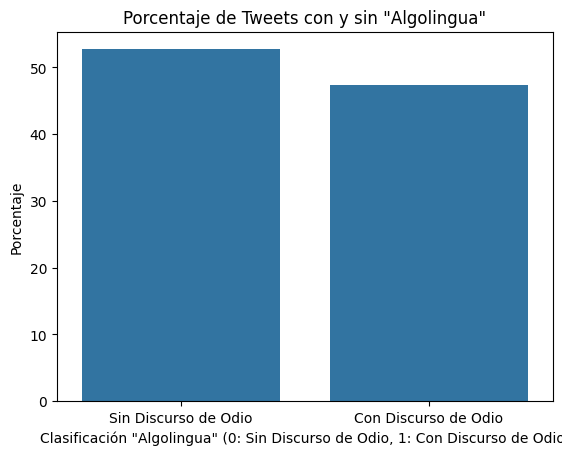

In [35]:
import pandas as pd
from joblib import load
import seaborn as sns
import matplotlib.pyplot as plt  # Aseg√∫rate de incluir esta l√≠nea


# Cargar los tweets ya procesados y con la columna Algolingua
df_choice = pd.read_excel('targeted_choicetweets_algolingua.xlsx')

# Cargar los nuevos tweets a clasificar y procesarlos
df_notchoice = pd.read_excel('/content/NOTchoicedtweets_algolingua.xlsx')
df_notchoice['Dirigido a personas'] = df_notchoice['Tweet'].apply(tweettargetedperson)
df_notchoice['Dirigido a minor√≠as'] = df_notchoice['Tweet'].apply(tweettargetedgroup)
df_notchoice['Emoticonos'] = df_notchoice['Tweet'].apply(emojis)
df_notchoice['Caracteres repetidos'] = df_notchoice['Tweet'].apply(detectar_caracteres_repetidos)
df_notchoice['N√∫meros y caracteres especiales'] = df_notchoice['Tweet'].apply(detectar_numeros_caracteres_especiales)
df_notchoice['Separaci√≥n de letras'] = df_notchoice['Tweet'].apply(detectar_separacion_letras)
df_notchoice['Discurso de odio'] = df_notchoice['Tweet'].apply(detectar_discurso_odio_con_preprocesamiento)
df_notchoice['Abreviaturas de insultos'] = df_notchoice['Tweet'].apply(detectar_abreviaturas_insultos)

# Concatenar ambos DataFrames
df_combined = pd.concat([df_choice, df_notchoice], ignore_index=True)

# Cargar el modelo entrenado
model = load('/content/logistic_regression_model.joblib')

# Preparar las caracter√≠sticas excluyendo la columna 'Tweet'
X_combined = df_combined.drop(['Tweet', 'Algolingua'], axis=1)

# Realizar predicciones con el modelo
predictions_combined = model.predict(X_combined)

# A√±adir las predicciones al DataFrame combinado
df_combined['Algolingua'] = predictions_combined

# Guardar las predicciones en un nuevo archivo Excel
df_combined.to_excel('/content/algolingua_classified_combined.xlsx', index=False)

# Calcular y mostrar el porcentaje de tweets clasificados como 'Algolingua'
porcentaje_algolingua = (df_combined['Algolingua'].mean() * 100)
print(f"Porcentaje de tweets con 'Algolingua': {porcentaje_algolingua:.2f}%")

# Calcular el n√∫mero de tuits clasificados como discurso de odio y no discurso de odio
conteo_algolingua = df_combined['Algolingua'].value_counts()

# Crear un gr√°fico de barras
sns.barplot(x=conteo_algolingua.index, y=(conteo_algolingua / conteo_algolingua.sum()) * 100)
plt.title('Porcentaje de Tweets con y sin "Algolingua"')
plt.xlabel('Clasificaci√≥n "Algolingua" (0: Sin Discurso de Odio, 1: Con Discurso de Odio)')
plt.ylabel('Porcentaje')
plt.xticks([0, 1], ['Sin Discurso de Odio', 'Con Discurso de Odio'])

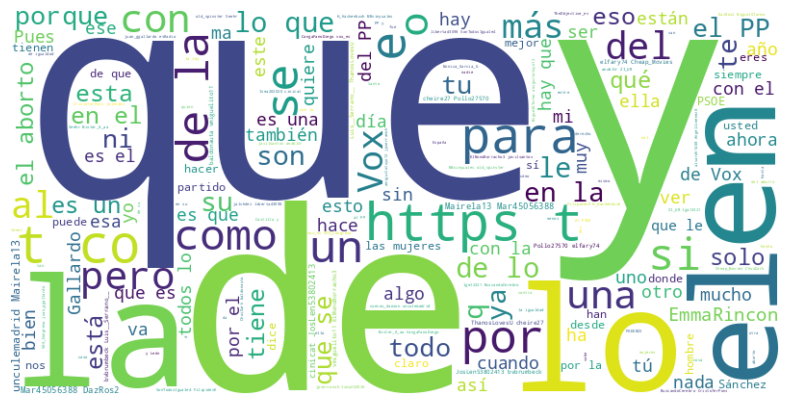

In [37]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo Excel
df_combined = pd.read_excel('/content/algolingua_classified_combined.xlsx')

# Filtrar los tuits clasificados como discurso de odio
tweets_discurso_odio = df_combined[df_combined['Algolingua'] == 1]['Tweet']

# Combinar todos los tuits en una √∫nica cadena de texto
texto_discurso_odio = " ".join(tuit for tuit in tweets_discurso_odio)

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_discurso_odio)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
